# NHL Draft EDA

Purpose of this notebook is to explore, analyze, and clean a dataset for a model which will predict successful/unsuccsessful NHL draft picks. Data is collecetd from NHL central scouting, and eliteprospects.com

In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/BRG4142/Documents/hockey stuff/NHL Draft data/NHL_draft_eda_data.xlsx")

In [3]:
df.head()

,OVERALL,NHL_TEAM,PLAYER,NATION,POS,AGE,LAST_PLAYED_NHL,NHL_GP,NHL_G,NHL_A,...,DRAFT_TEAM,AM_TEAM,LGE,GP,G,A,PTS,PIM,HT,WT
0,1,Edmonton Oilers,Taylor Hall,CA,LW,18,2022.0,761.0,248.0,409.0,...,Edmonton,Windsor Spitfires,OHL,57.0,40.0,66.0,106.0,56.0,6' 1,194
1,2,Boston Bruins,Tyler Seguin,CA,C,18,2022.0,825.0,305.0,381.0,...,Boston,Plymouth Whalers,OHL,63.0,48.0,58.0,106.0,54.0,6' 1,182
2,3,Florida Panthers,Erik Gudbranson,CA,D,18,2022.0,641.0,27.0,67.0,...,Florida,Kingston Frontenacs,OHL,41.0,2.0,21.0,23.0,68.0,6' 4,195
3,4,Columbus Blue Jackets,Ryan Johansen,CA,C,18,2022.0,787.0,177.0,350.0,...,Columbus,Portland Winterhawks,WHL,71.0,25.0,44.0,69.0,53.0,6' 2,192
4,5,New York Islanders,Nino Niederreiter,CH,RW,18,2022.0,732.0,181.0,187.0,...,NY Islanders,Portland Winterhawks,WHL,65.0,36.0,24.0,60.0,68.0,6' 2,205


In [4]:
df.columns

Index(['OVERALL', 'NHL_TEAM', 'PLAYER', 'NATION', 'POS', 'AGE',
       'LAST_PLAYED_NHL', 'NHL_GP', 'NHL_G', 'NHL_A', 'NHL_PTS', 'NHL_PLUSMIN',
       'NHL_PIM', 'PS', 'YEAR', 'POS2', 'ROUND', 'DRAFT_YEAR', 'DRAFT_TEAM',
       'AM_TEAM', 'LGE', 'GP', 'G', 'A', 'PTS', 'PIM', 'HT', 'WT'],
      dtype='object')

In [5]:
df.dtypes

OVERALL              int64
NHL_TEAM            object
PLAYER              object
NATION              object
POS                 object
AGE                  int64
LAST_PLAYED_NHL    float64
NHL_GP             float64
NHL_G              float64
NHL_A              float64
NHL_PTS            float64
NHL_PLUSMIN        float64
NHL_PIM            float64
PS                 float64
YEAR                 int64
POS2                object
ROUND              float64
DRAFT_YEAR         float64
DRAFT_TEAM          object
AM_TEAM             object
LGE                 object
GP                 float64
G                  float64
A                  float64
PTS                float64
PIM                float64
HT                  object
WT                   int64
dtype: object

# Clean the data

In [6]:
df['LGE'].unique()

array(['OHL', 'WHL', 'SM-liiga', 'QMJHL', 'USHL', 'USDP', 'KHL',
       'USHS-MN', 'BCHL', 'NCAA', 'USHS-Prep', 'EJHL', 'J20 SuperElit',
       'Slovakia', 'OJAHL', 'SuperElit', 'CCHL', 'AJHL', 'Jr. A SM-liiga',
       'Jr. B SM-sarja', 'J18 Elit', 'Germany2', 'SHL', 'J18 Allsvenskan',
       'DEL2', 'MJHL', 'SEL jr', 'UShigh', 'SEL', 'Belarus', 'Liiga',
       'NLA', 'Elitserien', 'Czech', 'HockeyAllsvenskan', 'U20 SM-liiga',
       'MHL', 'CCHA', 'HIGH-MN', 'OJHL', 'SWEDEN', 'WCHA', 'SWEDEN-JR.',
       'SWISS', 'RUSSIA-JR.', 'H-EAST', 'SLOVAKIA-JR.', 'SWEDEN-3',
       'HIGH-CT', 'ECAC', 'HIGH-MA', 'CZREP-JR.', 'RUSSIA', 'SWEDEN-2',
       'FINLAND', 'HIGH-WI', 'CJHL', 'HIGH', 'USHS-MI', 'U20 SM-sarja',
       'Denmark', 'Swiss-A', 'MHL B', 'Allsvenskan', 'H-East', 'VHL',
       'T1EHL 18U', 'U20-Elit', '18U AAA', 'Czech U20', 'USPHL Premier',
       'USHS-WI', nan, 'U18 SM-sarja', 'HockeyEttan', 'Mestis', 'Czech2',
       'Norway', 'NAHL', 'BIG10', 'Finland Jr.', 'Czech Republic'],

In [7]:
#condense leagues into smaller, better groups
#condense the leagues
conditions = [
    (df['LGE'] == 'USNTDP') | (df['LGE'] == 'USDP') | (df['LGE'] == 'NTDP') | (df['AM_TEAM'] == 'USNTDP Juniors') | (df['AM_TEAM'] == 'USA-U-18') | (df['AM_TEAM'] == 'U.S. National Development Team'),
    (df['LGE'] == 'CZE') | (df['LGE'] == 'Czech Republic') | (df['LGE'] == 'CZECH') | (df['LGE'] == 'CZREP') | (df['LGE'] == 'Czech'),
    (df['LGE'] == 'CZE JR.') | (df['LGE'] == 'CZREP-JR.') | (df['LGE'] == 'Czech2') | (df['LGE'] == 'CZREP-2') | (df['LGE'] == 'Czech U20') | (df['LGE'] == 'Czech 2') | (df['LGE'] == 'CZREP-JR. U18'),
    (df['LGE'] == 'Finland Jr.') | (df['LGE'] == 'Jr. A SM-liiga') | (df['LGE'] == 'U20 SM-sarja')| (df['LGE'] == 'U20 SM-liiga') | (df['LGE'] == 'FINLAND-JR.') ,
    (df['LGE'] == 'Jr. B SM-sarja') | (df['LGE'] == 'Jr. B SM-liiga') | (df['LGE'] == 'U18 SM-sarja') | (df['LGE'] == 'FINLAND JR-2')  | (df['LGE'] == 'FINLAND-JR. U18') | (df['LGE'] == 'FINLAND JR-2') | (df['LGE'] == 'U18 SM-liiga'),
    (df['LGE'] == 'RUSSIA') | (df['LGE'] == 'RUS') | (df['LGE'] == 'KHL'),
    (df['LGE'] == 'VHL') | (df['LGE'] == 'RUSSIA-3') | (df['LGE'] == 'RUSSIA-2') | (df['LGE'] == 'RUSSIA-JR.') | (df['LGE'] == 'RUSSIA JR. 2'),
    (df['LGE'] == 'MHL') | (df['LGE'] == 'MHL B'),
    (df['LGE'] == 'SLOVAKIA-2') | (df['LGE'] == 'SLOVAKIA-JR.'),
    (df['LGE'] == 'U20-Elit') | (df['LGE'] == 'SuperElit') | (df['LGE'] == 'J20 SuperElit') | (df['LGE'] == 'SEL jr') | (df['LGE'] == 'SWEDEN-JR.') | (df['LGE'] == 'J20 Elit') | (df['LGE'] == 'SJL'),
    (df['LGE'] == 'J18 Elit') | (df['LGE'] == 'SWEDEN-3') | (df['LGE'] == 'J18 Allsvenskan') | (df['LGE'] == 'SWEDEN-JR. U18')| (df['LGE'] == 'SWEDEN-JR. 2') | (df['LGE'] == 'SWE-JR. U18'),
    (df['LGE'] == 'SWISS-2') | (df['LGE'] == 'SWISS-3') | (df['LGE'] == 'SWISS-JR.'),
    (df['LGE'] == 'GERMAN-2') | (df['LGE'] == 'GERMAN-3') | (df['LGE'] == 'GERMAN-JR.') | (df['LGE'] == 'Germany2') | (df['LGE'] == 'DEL2'),
    (df['LGE'] == 'HIGH-MN') | (df['LGE'] == '18U AAA') | (df['LGE'] == 'T1EHL 18U') | (df['LGE'] == 'HIGH') | (df['LGE'] == 'UShigh') | (df['LGE'] == 'USHS-Prep') | (df['LGE'] == 'HIGH-WI') | (df['LGE'] == 'HIGH') | (df['LGE'] == 'HIGH-CT') | (df['LGE'] == 'HIGH-MA') | (df['LGE'] == 'USHS-MA')  | (df['LGE'] == 'USHS-MN') | (df['LGE'] == 'USHS-WI') | (df['LGE'] == 'HIGH-NY') | (df['LGE'] == 'HIGH-NJ') | (df['LGE'] == 'HIGH-NH') | (df['LGE'] == 'HIGH-IN') | (df['LGE'] == 'HIGH-MI') | (df['LGE'] == 'USHS-MI') | (df['LGE'] == 'USHSE') | (df['LGE'] == 'USHSW'),
    (df['LGE'] == 'WCHA') | (df['LGE'] == 'NCAA') | (df['LGE'] == 'H-East') | (df['LGE'] == 'CCHA') | (df['LGE'] == 'NCHC') | (df['LGE'] == 'H-EAST') | (df['LGE'] == 'ECAC') | (df['LGE'] == 'BIG10'),
    (df['LGE'] == 'OHL'),
    (df['LGE'] == 'WHL'),
    (df['LGE'] == 'QMJHL'),
    (df['LGE'] == 'USHL'),
    (df['LGE'] == 'SWEDEN') | (df['LGE'] == 'Elitserien') | (df['LGE'] == 'SHL') | (df['LGE'] == 'SEL'),
    (df['LGE'] == 'Allsvenskan') | (df['LGE'] == 'HockeyAllsvenskan') | (df['LGE'] == 'HockeyEttan') | (df['LGE'] == 'SWEDEN-2') ,
    (df['LGE'] == 'FINLAND') | (df['LGE'] == 'Liiga') | (df['LGE'] == 'SM-liiga'),
    (df['LGE'] == 'Mestis') | (df['LGE'] == 'FINLAND-2'),
    #(df['LGE'] == 'DENMARK') | (df['LGE'] == 'DENMARK-2') | (df['LGE'] == 'Denmark'),
    (df['LGE'] == 'GERMANY') | (df['LGE'] == 'DEL'),
    (df['LGE'] == 'BCHL') | (df['LGE'] == 'AJHL') | (df['LGE'] == 'MJHL') | (df['LGE'] == 'OJHL'),
    (df['LGE'] == 'AHL'),
    (df['LGE'] == 'EJHL') | (df['LGE'] == 'USPHL PRE.') | (df['LGE'] == 'USPHL Premier') | (df['LGE'] == 'NAHL'),
    #(df['LGE'] == 'ENGLAND'),
    #(df['LGE'] == 'FRANCE'),
    (df['LGE'] == 'SUI') | (df['LGE'] == 'SWISS') | (df['LGE'] == 'Swiss-A') | (df['LGE'] == 'SWISS-A') | (df['LGE'] == 'NLA'),
    (df['LGE'] == 'SVK') | (df['LGE'] == 'SLOVAKIA') | (df['LGE'] == 'Slovakia'),
    (df['LGE'] == 'NORWAY') | (df['LGE'] == 'DENMARK') | (df['LGE'] == 'DENMARK-2') | (df['LGE'] == 'Denmark') | (df['LGE'] == 'Norway') | (df['LGE'] == 'LAT') | (df['LGE'] == 'Belarus') | (df['LGE'] == 'FRANCE') | (df['LGE'] == 'ENGLAND'),
    #(df['LGE'] == 'LAT'),
    #(df['LGE'] == 'Belarus'),
    (df['LGE'] == 'KIJHL') | (df['LGE'] == 'OJAHL') | (df['LGE'] == 'WJRB') | (df['LGE'] == 'MWJRB') | (df['LGE'] == 'GHL') | (df['LGE'] == 'GOJHL') | (df['LGE'] == 'OPJRA') | (df['LGE'] == 'QC AAA') | (df['LGE'] == 'CJHL') | (df['LGE'] == 'CCHL') | (df['LGE'] == 'CHL') | (df['LGE'] == 'AMHL') | (df['LGE'] == 'OPJHL') | (df['LGE'] == 'HIGH-ON') | (df['LGE'] == 'HIGH-QC'),
    (df['LGE'] == 'MIDGET') | (df['LGE'] == 'MWEHL'),
    (df['LGE'] == 'BLR JR.') | (df['LGE'] == 'RBHS U20'),
]
choices = ['USNTDP', 'CZREP', 'CZREP-JR.', 'FINLAND-J20', 'FINLAND-J18', 'KHL', 'VHL', 'MHL', 'SLOVAKIA-JR.', 'SWEDEN-J20', 'SWEDEN-J18', 'SWISS-2/JR.', 'GERMAN-2/JR.', 'US-HIGH', 'NCAA', 'OHL', 'WHL', 'QMJHL', 'USHL'
          ,'SWEDEN', 'ALLSVENSKAN','FINLAND', 'MESTIS', 'GERMANY', 'CAN-JR-A', 'AHL', 'EJHL-NAHL', 'SWISS', 'SLOVAKIA', 'OTH-EUR-PRO', 'OTHER-CAN-JR', 'MIDGET'
          ,'OTH-EU-JR.']

df['LGE2'] = np.select(conditions, choices)

In [8]:
print(df['LGE'].loc[df['LGE2'] == '0'])

871    NaN
Name: LGE, dtype: object


In [9]:
df['LGE2'].value_counts()

OHL             245
WHL             207
QMJHL           129
US-HIGH          96
USHL             95
SWEDEN-J20       84
USNTDP           58
NCAA             48
CAN-JR-A         46
SWEDEN           28
FINLAND          23
FINLAND-J20      19
MHL              17
KHL              16
ALLSVENSKAN      13
EJHL-NAHL        10
SWISS             8
CZREP             7
OTHER-CAN-JR      7
VHL               6
CZREP-JR.         5
SWEDEN-J18        5
SLOVAKIA          3
GERMAN-2/JR.      3
OTH-EUR-PRO       3
SLOVAKIA-JR.      2
MESTIS            2
FINLAND-J18       2
0                 1
Name: LGE2, dtype: int64

# Create Features

In [10]:
#per-game stats draft year
df['PPG'] = df['PTS']/df['GP']
df['GPG'] = df['G']/df['GP']
df['APG'] = df['A']/df['GP']

In [11]:
#create flags for reach/regular/star players
#df['REACH_NHL'] = (df['NHL_GP'] > 0)[x for x in ]
#df['NHL_REGULAR'] = (df['NHL_GP'] > 160)

df['REACH_NHL'] = df['NHL_GP'].map(lambda x: 1 if x>0  else 0)
#df['NHL_REGULAR'] = df['NHL_GP'].map(lambda x: 1 if x>160  else 0)
df['STAR'] = df['PS'].map(lambda x: 1 if x>=42  else 0)

In [12]:
#define NHL regular based on number of games played in NHL
def nhl_reg_funct(row):
    if row['DRAFT_YEAR'] == 2016:
        if row['NHL_GP'] >= 110:
            return 1
        else:
            return 0
    elif row['DRAFT_YEAR'] == 2015:
        if row['NHL_GP'] >= 135:
            return 1
        else:
            return 0
    elif row['DRAFT_YEAR'] == 2014:
        if row['NHL_GP'] >= 165:
            return 1
        else:
            return 0
    else:
        if row['NHL_GP'] >= 185:
            return 1
        else:
            return 0
df['NHL_REGULAR'] = df.apply(nhl_reg_funct, axis=1)

In [13]:
def pro_lge(row):
    if (row['LGE2'] == 'SWEDEN')|(row['LGE2'] == 'FINLAND')|(row['LGE2'] == 'KHL')|(row['LGE2'] == 'SWISS')|(row['LGE2'] == 'CZREP')|(row['LGE2'] == 'GERMANY')|(row['LGE2'] == 'OTH-EUR-PRO')|(row['LGE2'] == 'SLOVAKIA'):
        return 1
    else:
        return 0
df['PRO_LEAGUE'] = df.apply(pro_lge, axis=1)

In [14]:
#break down frist round
pick_conditions = [
    (df['OVERALL'] <= 5),
    (df['OVERALL'] > 5) & (df['OVERALL'] <= 10),
    (df['OVERALL'] > 10) & (df['OVERALL'] <= 20),
    (df['OVERALL'] > 20) & (df['OVERALL'] <= 31),
    (df['OVERALL'] > 31) & (df['OVERALL'] <= 62),
    (df['OVERALL'] > 62) & (df['OVERALL'] <= 93),
    (df['OVERALL'] > 93) & (df['OVERALL'] <= 124),
    (df['OVERALL'] > 124) & (df['OVERALL'] <= 155),
    (df['OVERALL'] > 155) & (df['OVERALL'] <= 186),
    (df['OVERALL'] > 186)
]
pick_choices = ['1-5', '6-10', '11-20', '21-31', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7']

df['EXPANDED_ROUND'] = np.select(pick_conditions, pick_choices)

In [15]:
#draft year per game stats
df['AM_GPG'] = (df['G'] / df['GP'])
df['AM_APG'] = (df['A'] / df['GP'])
df['AM_PPG'] = (df['PTS'] / df['GP'])
df['AM_PIM_PG'] = (df['PIM'] / df['GP'])

In [16]:
#PS per NHL game played
df['PS_PG'] = df['PS'] / df['NHL_GP']
#df.head()

In [17]:
#Height
def height_funct(row):
    if (row['HT'] == "5' 6") | (row['HT'] == "5' 7") | (row['HT'] == "5' 8") | (row['HT'] == "5' 5"):
        return 5.08
    elif row['HT'] == "5' 9":
        return 5.09
    elif row['HT'] == "5' 10":
        return 5.10
    elif row['HT'] == "5' 11":
        return 5.11
    elif row['HT'] == "6' 0":
        return 6.00
    elif row['HT'] == "6' 1":
        return 6.01
    elif row['HT'] == "6' 2":
        return 6.02
    elif row['HT'] == "6' 3":
        return 6.03
    elif row['HT'] == "6' 4":
        return 6.04
    else:
        return 6.05

df['HT_CAT'] = df.apply(height_funct, axis=1)

In [18]:
#Height v2
def height_funct2(row):
    if (row['HT'] == "5' 6") | (row['HT'] == "5' 7") | (row['HT'] == "5' 8") | (row['HT'] == "5' 9")|(row['HT'] == "5' 5") | (row['HT'] == "5' 4"):
        return 1
    elif (row['HT'] == "5' 10") | (row['HT'] == "5' 11"):
        return 2
    elif (row['HT'] == "6' 0") | (row['HT'] == "6' 1"):
        return 3
    elif (row['HT'] == "6' 2") | (row['HT'] == "6' 3"):
        return 4
    elif (row['HT'] == "6' 4") | (row['HT'] == "6' 5") | (row['HT'] == "6' 6") | (row['HT'] == "6' 7") | (row['HT'] == "6' 8") | (row['HT'] == "6' 8"):
        return 5
    else:
        return 0

df['HT_CAT2'] = df.apply(height_funct2, axis=1)

In [19]:
#Position
#df['POS'].value_counts()
def pos_funct(row):
    if (row['POS'] == "LW") | (row['POS'] == "RW") | (row['POS'] == "C/LW") | (row['POS'] == "C/RW") | (row['POS'] == "F") | (row['POS'] == "W") | (row['POS'] == "C; LW") | (row['POS'] == "L/RW") | (row['POS'] == "C RW"):
        return 'W'
    elif row['POS'] == "C":
        return 'C'
    elif row['POS'] == "D":
        return 'D'

df['POS2'] = df.apply(pos_funct, axis=1)

In [20]:
#fill nan's with 0
df['PS'] = df['PS'].fillna(0)
df['NHL_GP'] = df['NHL_GP'].fillna(0)
df['NHL_G'] = df['NHL_G'].fillna(0)
df['NHL_A'] = df['NHL_A'].fillna(0)
df['NHL_PTS'] = df['NHL_PTS'].fillna(0)
df['NHL_PIM'] = df['NHL_PIM'].fillna(0)
df['NHL_PLUSMIN'] = df['NHL_PLUSMIN'].fillna(0)
df['LAST_PLAYED_NHL'] = df['LAST_PLAYED_NHL'].fillna(0)
df['PS_PG'] = df['PS_PG'].fillna(0)

# Create League Adjusted Stats

In [21]:
#set league stats for mean, std, min, max as fixed values
#OTH-CAN-JRA
OTH_CAN_JR_f_mean_gp = 50.69
OTH_CAN_JR_f_mean_g = 16.73
OTH_CAN_JR_f_mean_a = 22.35
OTH_CAN_JR_f_mean_tp = 19.08
OTH_CAN_JR_f_mean_ppg = 0.771
OTH_CAN_JR_f_mean_gpg = 0.221
OTH_CAN_JR_f_mean_apg = 0.44
OTH_CAN_JR_f_std_gp = 6.99
OTH_CAN_JR_f_std_g = 7.01
OTH_CAN_JR_f_std_a = 8.76
OTH_CAN_JR_f_std_tp = 13.88
OTH_CAN_JR_f_std_ppg = 0.244
OTH_CAN_JR_f_std_gpg = 0.129
OTH_CAN_JR_f_std_apg = 0.258
OTH_CAN_JR_f_min_gp = 24
OTH_CAN_JR_f_min_g = 6
OTH_CAN_JR_f_min_a = 5
OTH_CAN_JR_f_min_tp = 14
OTH_CAN_JR_f_min_ppg = 0.5
OTH_CAN_JR_f_min_gpg = 0.125
OTH_CAN_JR_f_min_apg = 0.12
OTH_CAN_JR_f_max_gp = 60
OTH_CAN_JR_f_max_g = 53
OTH_CAN_JR_f_max_a = 64
OTH_CAN_JR_f_max_tp = 102
OTH_CAN_JR_f_max_ppg = 1.93
OTH_CAN_JR_f_max_gpg = 0.98
OTH_CAN_JR_f_max_apg = 1.21

OTH_CAN_JR_d_mean_gp = 48.31
OTH_CAN_JR_d_mean_g = 5.20
OTH_CAN_JR_d_mean_a = 18.82
OTH_CAN_JR_d_mean_tp = 24.02
OTH_CAN_JR_d_mean_ppg = 0.49
OTH_CAN_JR_d_mean_gpg = 0.107
OTH_CAN_JR_d_mean_apg = 0.38
OTH_CAN_JR_d_std_gp = 7.2
OTH_CAN_JR_d_std_g = 3.25
OTH_CAN_JR_d_std_a = 8.91
OTH_CAN_JR_d_std_tp = 10.51
OTH_CAN_JR_d_std_ppg = 0.19
OTH_CAN_JR_d_std_gpg = 0.06
OTH_CAN_JR_d_std_apg = 0.16
OTH_CAN_JR_d_min_gp = 23
OTH_CAN_JR_d_min_g = 0
OTH_CAN_JR_d_min_a = 4
OTH_CAN_JR_d_min_tp = 8
OTH_CAN_JR_d_min_ppg = 0.3
OTH_CAN_JR_d_min_gpg = 0.0
OTH_CAN_JR_d_min_apg = 0.111
OTH_CAN_JR_d_max_gp = 58
OTH_CAN_JR_d_max_g = 20
OTH_CAN_JR_d_max_a = 63
OTH_CAN_JR_d_max_tp = 75
OTH_CAN_JR_d_max_ppg = 1.39
OTH_CAN_JR_d_max_gpg = 0.41
OTH_CAN_JR_d_max_apg = 1.167

In [22]:
#US_HIGH
US_HIGH_f_mean_gp = 28.66
US_HIGH_f_mean_g = 25.14
US_HIGH_f_mean_a = 28.71
US_HIGH_f_mean_tp = 53.85
US_HIGH_f_mean_ppg = 1.84
US_HIGH_f_mean_gpg = 0.90
US_HIGH_f_mean_apg = 1.03
US_HIGH_f_std_gp = 9.42
US_HIGH_f_std_g = 11.92
US_HIGH_f_std_a = 11.11
US_HIGH_f_std_tp = 20.31
US_HIGH_f_std_ppg = 0.689
US_HIGH_f_std_gpg = 0.41
US_HIGH_f_std_apg = 0.38
US_HIGH_f_min_gp = 14
US_HIGH_f_min_g = 4
US_HIGH_f_min_a = 8
US_HIGH_f_min_tp = 15
US_HIGH_f_min_ppg = 0.625
US_HIGH_f_min_gpg = 0.167
US_HIGH_f_min_apg = 0.333
US_HIGH_f_max_gp = 56
US_HIGH_f_max_g = 58
US_HIGH_f_max_a = 64
US_HIGH_f_max_tp = 107
US_HIGH_f_max_ppg = 3.714
US_HIGH_f_max_gpg = 2.07
US_HIGH_f_max_apg = 2.07

US_HIGH_d_mean_gp = 27.7
US_HIGH_d_mean_g = 7.89
US_HIGH_d_mean_a = 19.76
US_HIGH_d_mean_tp = 27.66
US_HIGH_d_mean_ppg = 1.03
US_HIGH_d_mean_gpg = 0.297
US_HIGH_d_mean_apg = 0.73
US_HIGH_d_std_gp = 6.91
US_HIGH_d_std_g = 4.03
US_HIGH_d_std_a = 8.34
US_HIGH_d_std_tp = 10.67
US_HIGH_d_std_ppg = 0.417
US_HIGH_d_std_gpg = 0.16
US_HIGH_d_std_apg = 0.32
US_HIGH_d_min_gp = 18
US_HIGH_d_min_g = 1
US_HIGH_d_min_a = 4
US_HIGH_d_min_tp = 9
US_HIGH_d_min_ppg = 0.3
US_HIGH_d_min_gpg = 0.03
US_HIGH_d_min_apg = 0.15
US_HIGH_d_max_gp = 57
US_HIGH_d_max_g = 18
US_HIGH_d_max_a = 37
US_HIGH_d_max_tp = 50
US_HIGH_d_max_ppg = 2.08
US_HIGH_d_max_gpg = 0.78
US_HIGH_d_max_apg = 1.36

In [23]:
#USHL
USHL_f_mean_gp = 46.51
USHL_f_mean_g = 11.0
USHL_f_mean_a = 15.68
USHL_f_mean_tp = 26.68
USHL_f_mean_ppg = 0.56
USHL_f_mean_gpg = 0.23
USHL_f_mean_apg = 0.33
USHL_f_std_gp = 12.73
USHL_f_std_g = 8.07
USHL_f_std_a = 9.81
USHL_f_std_tp = 16.87
USHL_f_std_ppg = 0.31
USHL_f_std_gpg = 0.154
USHL_f_std_apg = 0.177
USHL_f_min_gp = 10
USHL_f_min_g = 0
USHL_f_min_a = 1
USHL_f_min_tp = 2
USHL_f_min_ppg = 0.14
USHL_f_min_gpg = 0.0
USHL_f_min_apg = 0.05
USHL_f_max_gp = 62
USHL_f_max_g = 48
USHL_f_max_a = 41
USHL_f_max_tp = 85
USHL_f_max_ppg = 1.67
USHL_f_max_gpg = 0.94
USHL_f_max_apg = 1.0

USHL_d_mean_gp = 44.93
USHL_d_mean_g = 2.79
USHL_d_mean_a = 11.05
USHL_d_mean_tp = 13.85
USHL_d_mean_ppg = 0.30
USHL_d_mean_gpg = 0.06
USHL_d_mean_apg = 0.23
USHL_d_std_gp = 13.70
USHL_d_std_g = 2.55
USHL_d_std_a = 8.30
USHL_d_std_tp = 9.83
USHL_d_std_ppg = 0.173
USHL_d_std_gpg = 0.053
USHL_d_std_apg = 0.146
USHL_d_min_gp = 11
USHL_d_min_g = 0
USHL_d_min_a = 1
USHL_d_min_tp = 2
USHL_d_min_ppg = 0.1
USHL_d_min_gpg = 0.0
USHL_d_min_apg = 0.05
USHL_d_max_gp = 62
USHL_d_max_g = 14
USHL_d_max_a = 45
USHL_d_max_tp = 52
USHL_d_max_ppg = 0.93
USHL_d_max_gpg = 0.234
USHL_d_max_apg = 0.803

In [24]:
#USNTDP
USNTDP_f_mean_gp = 22.65
USNTDP_f_mean_g = 7.62
USNTDP_f_mean_a = 10.27
USNTDP_f_mean_tp = 17.90
USNTDP_f_mean_ppg = 0.791
USNTDP_f_mean_gpg = 0.34
USNTDP_f_mean_apg = 0.451
USNTDP_f_std_gp = 4.627
USNTDP_f_std_g = 5.10
USNTDP_f_std_a = 7.43
USNTDP_f_std_tp = 11.36
USNTDP_f_std_ppg = 0.468
USNTDP_f_std_gpg = 0.216
USNTDP_f_std_apg = 0.311
USNTDP_f_min_gp = 5
USNTDP_f_min_g = 0
USNTDP_f_min_a = 0
USNTDP_f_min_tp = 1
USNTDP_f_min_ppg = 0.07
USNTDP_f_min_gpg = 0.00
USNTDP_f_min_apg = 0.00
USNTDP_f_max_gp = 31
USNTDP_f_max_g = 29
USNTDP_f_max_a = 36
USNTDP_f_max_tp = 48
USNTDP_f_max_ppg = 2.13
USNTDP_f_max_gpg = 1.08
USNTDP_f_max_apg = 1.5

USNTDP_d_mean_gp = 23.53
USNTDP_d_mean_g = 2.33
USNTDP_d_mean_a = 7.76
USNTDP_d_mean_tp = 10.09
USNTDP_d_mean_ppg = 0.428
USNTDP_d_mean_gpg = 0.10
USNTDP_d_mean_apg = 0.33
USNTDP_d_std_gp = 3.52
USNTDP_d_std_g = 1.85
USNTDP_d_std_a = 5.096
USNTDP_d_std_tp = 6.20
USNTDP_d_std_ppg = 0.247
USNTDP_d_std_gpg = 0.079
USNTDP_d_std_apg = 0.203
USNTDP_d_min_gp = 11
USNTDP_d_min_g = 0
USNTDP_d_min_a = 0
USNTDP_d_min_tp = 0
USNTDP_d_min_ppg = 0
USNTDP_d_min_gpg = 0
USNTDP_d_min_apg = 0
USNTDP_d_max_gp = 32
USNTDP_d_max_g = 9
USNTDP_d_max_a = 26
USNTDP_d_max_tp = 33
USNTDP_d_max_ppg = 1.19
USNTDP_d_max_gpg = 0.429
USNTDP_d_max_apg = 0.963

In [25]:
#NCAA
NCAA_f_mean_gp = 35.5
NCAA_f_mean_g = 8.77
NCAA_f_mean_a = 13.04
NCAA_f_mean_tp = 21.81
NCAA_f_mean_ppg = 0.62
NCAA_f_mean_gpg = 0.25
NCAA_f_mean_apg = 0.37
NCAA_f_std_gp = 4.29
NCAA_f_std_g = 5.24
NCAA_f_std_a = 8.28
NCAA_f_std_tp = 12.69
NCAA_f_std_ppg = 0.338
NCAA_f_std_gpg = 0.143
NCAA_f_std_apg = 0.219
NCAA_f_min_gp = 24
NCAA_f_min_g = 3
NCAA_f_min_a = 4
NCAA_f_min_tp = 7
NCAA_f_min_ppg = 0.19
NCAA_f_min_gpg = 0.08
NCAA_f_min_apg = 0.11
NCAA_f_max_gp = 41
NCAA_f_max_g = 26
NCAA_f_max_a = 45
NCAA_f_max_tp = 71
NCAA_f_max_ppg = 1.78
NCAA_f_max_gpg = 0.65
NCAA_f_max_apg = 1.125

NCAA_d_mean_gp = 34.00
NCAA_d_mean_g = 3.12
NCAA_d_mean_a = 10.88
NCAA_d_mean_tp = 14.00
NCAA_d_mean_ppg = 0.407
NCAA_d_mean_gpg = 0.092
NCAA_d_mean_apg = 0.316
NCAA_d_std_gp = 4.52
NCAA_d_std_g = 2.11
NCAA_d_std_a = 6.68
NCAA_d_std_tp = 8.13
NCAA_d_std_ppg = 0.21
NCAA_d_std_gpg = 0.06
NCAA_d_std_apg = 0.18
NCAA_d_min_gp = 26
NCAA_d_min_g = 1
NCAA_d_min_a = 2
NCAA_d_min_tp = 3
NCAA_d_min_ppg = 0.10
NCAA_d_min_gpg = 0.026
NCAA_d_min_apg = 0.065
NCAA_d_max_gp = 39
NCAA_d_max_g = 9
NCAA_d_max_a = 24
NCAA_d_max_tp = 29
NCAA_d_max_ppg = 0.78
NCAA_d_max_gpg = 0.257
NCAA_d_max_apg = 0.648

In [26]:
#WHL
WHL_f_mean_gp = 59.34
WHL_f_mean_g = 14.01
WHL_f_mean_a = 20.15
WHL_f_mean_tp = 34.16
WHL_f_mean_ppg = 0.57
WHL_f_mean_gpg = 0.24
WHL_f_mean_apg = 0.34
WHL_f_std_gp = 11.16
WHL_f_std_g = 8.59
WHL_f_std_a = 12.35
WHL_f_std_tp = 19.78
WHL_f_std_ppg = 0.30
WHL_f_std_gpg = 0.137
WHL_f_std_apg = 0.187
WHL_f_min_gp = 20
WHL_f_min_g = 1
WHL_f_min_a = 3
WHL_f_min_tp = 8
WHL_f_min_ppg = 0.21
WHL_f_min_gpg = 0.015
WHL_f_min_apg = 0.07
WHL_f_max_gp = 72
WHL_f_max_g = 42
WHL_f_max_a = 67
WHL_f_max_tp = 99
WHL_f_max_ppg = 1.69
WHL_f_max_gpg = 0.72
WHL_f_max_apg = 0.965

WHL_d_mean_gp = 58.99
WHL_d_mean_g = 4.63
WHL_d_mean_a = 18.241
WHL_d_mean_tp = 22.874
WHL_d_mean_ppg = 0.38
WHL_d_mean_gpg = 0.08
WHL_d_mean_apg = 0.3
WHL_d_std_gp = 9.81
WHL_d_std_g = 4.05
WHL_d_std_a = 11.45
WHL_d_std_tp = 14.35
WHL_d_std_ppg = 0.22
WHL_d_std_gpg = 0.06
WHL_d_std_apg = 0.17
WHL_d_min_gp = 28
WHL_d_min_g = 0
WHL_d_min_a = 5
WHL_d_min_tp = 6
WHL_d_min_ppg = 0.15
WHL_d_min_gpg = 0
WHL_d_min_apg = 0.097
WHL_d_max_gp = 72
WHL_d_max_g = 26
WHL_d_max_a = 61
WHL_d_max_tp = 73
WHL_d_max_ppg = 1.06
WHL_d_max_gpg = 0.39
WHL_d_max_apg = 0.91

In [27]:
#OHL
OHL_f_mean_gp = 60.27
OHL_f_mean_g = 15.95
OHL_f_mean_a = 20.79
OHL_f_mean_tp = 36.74
OHL_f_mean_ppg = 0.606
OHL_f_mean_gpg = 0.26
OHL_f_mean_apg = 0.34
OHL_f_std_gp = 8.32
OHL_f_std_g = 9.5
OHL_f_std_a = 12.74
OHL_f_std_tp = 20.58
OHL_f_std_ppg = 0.33
OHL_f_std_gpg = 0.15
OHL_f_std_apg = 0.21
OHL_f_min_gp = 22
OHL_f_min_g = 2
OHL_f_min_a = 3
OHL_f_min_tp = 7
OHL_f_min_ppg = 0.2
OHL_f_min_gpg = 0.04
OHL_f_min_apg = 0.07
OHL_f_max_gp = 70
OHL_f_max_g = 52
OHL_f_max_a = 81
OHL_f_max_tp = 120
OHL_f_max_ppg = 2.14
OHL_f_max_gpg = 0.91
OHL_f_max_apg = 1.45

OHL_d_mean_gp = 58.52
OHL_d_mean_g = 4.78
OHL_d_mean_a = 18.04
OHL_d_mean_tp = 22.82
OHL_d_mean_ppg = 0.382
OHL_d_mean_gpg = 0.08
OHL_d_mean_apg = 0.30
OHL_d_std_gp = 8.71
OHL_d_std_g = 4.05
OHL_d_std_a = 10.93
OHL_d_std_tp = 14.09
OHL_d_std_ppg = 0.21
OHL_d_std_gpg = 0.06
OHL_d_std_apg = 0.165
OHL_d_min_gp = 31
OHL_d_min_g = 0
OHL_d_min_a = 4
OHL_d_min_tp = 7
OHL_d_min_ppg = 0.15
OHL_d_min_gpg = 0.0
OHL_d_min_apg = 0.07
OHL_d_max_gp = 68
OHL_d_max_g = 25
OHL_d_max_a = 62
OHL_d_max_tp = 87
OHL_d_max_ppg = 1.30
OHL_d_max_gpg = 0.37
OHL_d_max_apg = 0.93

In [28]:
#QMJHL
QMJHL_f_mean_gp = 55.47
QMJHL_f_mean_g = 13.17
QMJHL_f_mean_a = 17.91
QMJHL_f_mean_tp = 31.09
QMJHL_f_mean_ppg = 0.56
QMJHL_f_mean_gpg = 0.24
QMJHL_f_mean_apg = 0.33
QMJHL_f_std_gp = 11.18
QMJHL_f_std_g = 8.81
QMJHL_f_std_a = 11.89
QMJHL_f_std_tp = 19.3
QMJHL_f_std_ppg = 0.33
QMJHL_f_std_gpg = 0.15
QMJHL_f_std_apg = 0.21
QMJHL_f_min_gp = 26
QMJHL_f_min_g = 1
QMJHL_f_min_a = 3
QMJHL_f_min_tp = 6
QMJHL_f_min_ppg = 0.16
QMJHL_f_min_gpg = 0.02
QMJHL_f_min_apg = 0.07
QMJHL_f_max_gp = 69
QMJHL_f_max_g = 45
QMJHL_f_max_a = 77
QMJHL_f_max_tp = 112
QMJHL_f_max_ppg = 2.15
QMJHL_f_max_gpg = 0.77
QMJHL_f_max_apg = 1.48

QMJHL_d_mean_gp = 55.66
QMJHL_d_mean_g = 3.94
QMJHL_d_mean_a = 14.59
QMJHL_d_mean_tp = 18.53
QMJHL_d_mean_ppg = 0.32
QMJHL_d_mean_gpg = 0.07
QMJHL_d_mean_apg = 0.25
QMJHL_d_std_gp = 10.59
QMJHL_d_std_g = 3.87
QMJHL_d_std_a = 10.93
QMJHL_d_std_tp = 13.97
QMJHL_d_std_ppg = 0.22
QMJHL_d_std_gpg = 0.06
QMJHL_d_std_apg = 0.17
QMJHL_d_min_gp = 32
QMJHL_d_min_g = 0
QMJHL_d_min_a = 0
QMJHL_d_min_tp = 0
QMJHL_d_min_ppg = 0
QMJHL_d_min_gpg = 0
QMJHL_d_min_apg = 0
QMJHL_d_max_gp = 69
QMJHL_d_max_g = 20
QMJHL_d_max_a = 57
QMJHL_d_max_tp = 69
QMJHL_d_max_ppg = 1.03
QMJHL_d_max_gpg = 0.31
QMJHL_d_max_apg = 0.84

In [29]:
#U20SM_SAARJA - finland u20
U20SM_SAARJA_f_mean_gp = 32.35
U20SM_SAARJA_f_mean_g = 8.14
U20SM_SAARJA_f_mean_a = 11.57
U20SM_SAARJA_f_mean_tp = 19.72
U20SM_SAARJA_f_mean_ppg = 0.60
U20SM_SAARJA_f_mean_gpg = 0.25
U20SM_SAARJA_f_mean_apg = 0.35
U20SM_SAARJA_f_std_gp = 12.97
U20SM_SAARJA_f_std_g = 5.78
U20SM_SAARJA_f_std_a = 8.10
U20SM_SAARJA_f_std_tp = 12.65
U20SM_SAARJA_f_std_ppg = 0.29
U20SM_SAARJA_f_std_gpg = 0.14
U20SM_SAARJA_f_std_apg = 0.19
U20SM_SAARJA_f_min_gp = 7
U20SM_SAARJA_f_min_g = 0
U20SM_SAARJA_f_min_a = 0
U20SM_SAARJA_f_min_tp = 0
U20SM_SAARJA_f_min_ppg = 0.21
U20SM_SAARJA_f_min_gpg = 0.00
U20SM_SAARJA_f_min_apg = 0.00
U20SM_SAARJA_f_max_gp = 52
U20SM_SAARJA_f_max_g = 42
U20SM_SAARJA_f_max_a = 45
U20SM_SAARJA_f_max_tp = 73
U20SM_SAARJA_f_max_ppg = 1.64
U20SM_SAARJA_f_max_gpg = 0.81
U20SM_SAARJA_f_max_apg = 1.09

U20SM_SAARJA_d_mean_gp = 30.69
U20SM_SAARJA_d_mean_g = 2.48
U20SM_SAARJA_d_mean_a = 7.80
U20SM_SAARJA_d_mean_tp = 10.28
U20SM_SAARJA_d_mean_ppg = 0.333
U20SM_SAARJA_d_mean_gpg = 0.08
U20SM_SAARJA_d_mean_apg = 0.25
U20SM_SAARJA_d_std_gp = 12.27
U20SM_SAARJA_d_std_g = 2.57
U20SM_SAARJA_d_std_a = 6.15
U20SM_SAARJA_d_std_tp = 7.81
U20SM_SAARJA_d_std_ppg = 0.207
U20SM_SAARJA_d_std_gpg = 0.075
U20SM_SAARJA_d_std_apg = 0.165
U20SM_SAARJA_d_min_gp = 9
U20SM_SAARJA_d_min_g = 0
U20SM_SAARJA_d_min_a = 1
U20SM_SAARJA_d_min_tp = 2
U20SM_SAARJA_d_min_ppg = 0.1
U20SM_SAARJA_d_min_gpg = 0.00
U20SM_SAARJA_d_min_apg = 0.05
U20SM_SAARJA_d_max_gp = 53
U20SM_SAARJA_d_max_g = 11
U20SM_SAARJA_d_max_a = 33
U20SM_SAARJA_d_max_tp = 36
U20SM_SAARJA_d_max_ppg = 1.09
U20SM_SAARJA_d_max_gpg = 0.364
U20SM_SAARJA_d_max_apg = 0.889

In [30]:
#LIIGA 
LIIGA_f_mean_gp = 19.97
LIIGA_f_mean_g = 3.33
LIIGA_f_mean_a = 4.05
LIIGA_f_mean_tp = 7.39
LIIGA_f_mean_ppg = 0.23
LIIGA_f_mean_gpg = 0.11
LIIGA_f_mean_apg = 0.12
LIIGA_f_std_gp = 19.26
LIIGA_f_std_g = 5.15
LIIGA_f_std_a = 6.17
LIIGA_f_std_tp = 10.98
LIIGA_f_std_ppg = 0.301
LIIGA_f_std_gpg = 0.15
LIIGA_f_std_apg = 0.14
LIIGA_f_min_gp = 1
LIIGA_f_min_g = 0
LIIGA_f_min_a = 0
LIIGA_f_min_tp = 0
LIIGA_f_min_ppg = 0.00
LIIGA_f_min_gpg = 0.00
LIIGA_f_min_apg = 0.00
LIIGA_f_max_gp = 57
LIIGA_f_max_g = 22
LIIGA_f_max_a = 27
LIIGA_f_max_tp = 48
LIIGA_f_max_ppg = 1.0
LIIGA_f_max_gpg = 1.0
LIIGA_f_max_apg = 0.51

LIIGA_d_mean_gp = 17.69
LIIGA_d_mean_g = 0.77
LIIGA_d_mean_a = 2.71
LIIGA_d_mean_tp = 3.48
LIIGA_d_mean_ppg = 0.131
LIIGA_d_mean_gpg = 0.037
LIIGA_d_mean_apg = 0.093
LIIGA_d_std_gp = 17.03
LIIGA_d_std_g = 1.23
LIIGA_d_std_a = 4.23
LIIGA_d_std_tp = 5.08
LIIGA_d_std_ppg = 0.15
LIIGA_d_std_gpg = 0.085
LIIGA_d_std_apg = 0.117
LIIGA_d_min_gp = 1
LIIGA_d_min_g = 0
LIIGA_d_min_a = 0
LIIGA_d_min_tp = 0
LIIGA_d_min_ppg = 0.00
LIIGA_d_min_gpg = 0.00
LIIGA_d_min_apg = 0.00
LIIGA_d_max_gp = 56
LIIGA_d_max_g = 5
LIIGA_d_max_a = 16
LIIGA_d_max_tp = 19
LIIGA_d_max_ppg = 0.5
LIIGA_d_max_gpg = 0.5
LIIGA_d_max_apg = 0.5

In [31]:
#SHL 
SHL_f_mean_gp = 12.48
SHL_f_mean_g = 1.00
SHL_f_mean_a = 1.28
SHL_f_mean_tp = 2.2
SHL_f_mean_ppg = 0.09
SHL_f_mean_gpg = 0.04
SHL_f_mean_apg = 0.05
SHL_f_std_gp = 13.56
SHL_f_std_g = 2.18
SHL_f_std_a = 2.75
SHL_f_std_tp = 4.76
SHL_f_std_ppg = 0.147
SHL_f_std_gpg = 0.07
SHL_f_std_apg = 0.095
SHL_f_min_gp = 1
SHL_f_min_g = 0
SHL_f_min_a = 0
SHL_f_min_tp = 0
SHL_f_min_ppg = 0.00
SHL_f_min_gpg = 0.00
SHL_f_min_apg = 0.00
SHL_f_max_gp = 50
SHL_f_max_g = 11
SHL_f_max_a = 19
SHL_f_max_tp = 30
SHL_f_max_ppg = 0.75
SHL_f_max_gpg = 0.375
SHL_f_max_apg = 0.5

SHL_d_mean_gp = 12.0
SHL_d_mean_g = 0.302
SHL_d_mean_a = 0.895
SHL_d_mean_tp = 1.197
SHL_d_mean_ppg = 0.052
SHL_d_mean_gpg = 0.01
SHL_d_mean_apg = 0.04
SHL_d_std_gp = 11.78
SHL_d_std_g = 0.914
SHL_d_std_a = 1.92
SHL_d_std_tp = 2.64
SHL_d_std_ppg = 0.092
SHL_d_std_gpg = 0.027
SHL_d_std_apg = 0.077
SHL_d_min_gp = 0
SHL_d_min_g = 0
SHL_d_min_a = 0
SHL_d_min_tp = 0
SHL_d_min_ppg = 0.00
SHL_d_min_gpg = 0.00
SHL_d_min_apg = 0.00
SHL_d_max_gp = 44
SHL_d_max_g = 7
SHL_d_max_a = 13
SHL_d_max_tp = 20
SHL_d_max_ppg = 0.49
SHL_d_max_gpg = 0.171
SHL_d_max_apg = 0.333

In [32]:
#J20_SuperElit 
J20_SuperElit_f_mean_gp = 32.68
J20_SuperElit_f_mean_g = 8.42
J20_SuperElit_f_mean_a = 10.66
J20_SuperElit_f_mean_tp = 19.08
J20_SuperElit_f_mean_ppg = 0.567
J20_SuperElit_f_mean_gpg = 0.249
J20_SuperElit_f_mean_apg = 0.318
J20_SuperElit_f_std_gp = 11.00
J20_SuperElit_f_std_g = 6.04
J20_SuperElit_f_std_a = 7.63
J20_SuperElit_f_std_tp = 12.48
J20_SuperElit_f_std_ppg = 0.328
J20_SuperElit_f_std_gpg = 0.165
J20_SuperElit_f_std_apg = 0.107
J20_SuperElit_f_min_gp = 9
J20_SuperElit_f_min_g = 0
J20_SuperElit_f_min_a = 0
J20_SuperElit_f_min_tp = 1
J20_SuperElit_f_min_ppg = 0.05
J20_SuperElit_f_min_gpg = 0.0
J20_SuperElit_f_min_apg = 0.0
J20_SuperElit_f_max_gp = 48
J20_SuperElit_f_max_g = 33
J20_SuperElit_f_max_a = 39
J20_SuperElit_f_max_tp = 66
J20_SuperElit_f_max_ppg = 1.93
J20_SuperElit_f_max_gpg = 1.1
J20_SuperElit_f_max_apg = 1.222

J20_SuperElit_d_mean_gp = 34.23
J20_SuperElit_d_mean_g = 3.86
J20_SuperElit_d_mean_a = 9.85
J20_SuperElit_d_mean_tp = 13.71
J20_SuperElit_d_mean_ppg = 0.407
J20_SuperElit_d_mean_gpg = 0.117
J20_SuperElit_d_mean_apg = 0.290
J20_SuperElit_d_std_gp = 9.72
J20_SuperElit_d_std_g = 2.92
J20_SuperElit_d_std_a = 5.7
J20_SuperElit_d_std_tp = 7.62
J20_SuperElit_d_std_ppg = 0.21
J20_SuperElit_d_std_gpg = 0.09
J20_SuperElit_d_std_apg = 0.153
J20_SuperElit_d_min_gp = 10
J20_SuperElit_d_min_g = 0
J20_SuperElit_d_min_a = 1
J20_SuperElit_d_min_tp = 2
J20_SuperElit_d_min_ppg = 0.1
J20_SuperElit_d_min_gpg = 0.00
J20_SuperElit_d_min_apg = 0.063
J20_SuperElit_d_max_gp = 49
J20_SuperElit_d_max_g = 14
J20_SuperElit_d_max_a = 28
J20_SuperElit_d_max_tp = 38
J20_SuperElit_d_max_ppg = 1.21
J20_SuperElit_d_max_gpg = 0.56
J20_SuperElit_d_max_apg = 0.956

In [33]:
#MHL 
MHL_f_mean_gp = 47.41
MHL_f_mean_g = 11.19
MHL_f_mean_a = 13.29
MHL_f_mean_tp = 24.48
MHL_f_mean_ppg = 0.53
MHL_f_mean_gpg = 0.243
MHL_f_mean_apg = 0.287
MHL_f_std_gp = 10.61
MHL_f_std_g = 5.49
MHL_f_std_a = 6.21
MHL_f_std_tp = 10.21
MHL_f_std_ppg = 0.221
MHL_f_std_gpg = 0.121
MHL_f_std_apg = 0.135
MHL_f_min_gp = 11
MHL_f_min_g = 1
MHL_f_min_a = 3
MHL_f_min_tp = 10
MHL_f_min_ppg = 0.25
MHL_f_min_gpg = 0.04
MHL_f_min_apg = 0.05
MHL_f_max_gp = 64
MHL_f_max_g = 40
MHL_f_max_a = 37
MHL_f_max_tp = 73
MHL_f_max_ppg = 1.64
MHL_f_max_gpg = 0.909
MHL_f_max_apg = 1.0

MHL_d_mean_gp = 44.87
MHL_d_mean_g = 3.06
MHL_d_mean_a = 8.39
MHL_d_mean_tp = 11.45
MHL_d_mean_ppg = 0.264
MHL_d_mean_gpg = 0.07
MHL_d_mean_apg = 0.193
MHL_d_std_gp = 11.58
MHL_d_std_g = 2.28
MHL_d_std_a = 4.88
MHL_d_std_tp = 6.15
MHL_d_std_ppg = 0.141
MHL_d_std_gpg = 0.05
MHL_d_std_apg = 0.113
MHL_d_min_gp = 10
MHL_d_min_g = 0
MHL_d_min_a = 0
MHL_d_min_tp = 3
MHL_d_min_ppg = 0.1
MHL_d_min_gpg = 0.0
MHL_d_min_apg = 0.0
MHL_d_max_gp = 64
MHL_d_max_g = 14
MHL_d_max_a = 30
MHL_d_max_tp = 41
MHL_d_max_ppg = 0.9
MHL_d_max_gpg = 0.32
MHL_d_max_apg = 0.8

In [34]:
#KHL 
KHL_f_mean_gp = 9.52
KHL_f_mean_g = 0.62
KHL_f_mean_a = 0.88
KHL_f_mean_tp = 1.51
KHL_f_mean_ppg = 0.064
KHL_f_mean_gpg = 0.024
KHL_f_mean_apg = 0.039
KHL_f_std_gp = 10.98
KHL_f_std_g = 1.81
KHL_f_std_a = 1.99
KHL_f_std_tp = 3.58
KHL_f_std_ppg = 0.111
KHL_f_std_gpg = 0.054
KHL_f_std_apg = 0.074
KHL_f_min_gp = 1
KHL_f_min_g = 0
KHL_f_min_a = 0
KHL_f_min_tp = 0
KHL_f_min_ppg = 0.00
KHL_f_min_gpg = 0.00
KHL_f_min_apg = 0.00
KHL_f_max_gp = 42
KHL_f_max_g = 13
KHL_f_max_a = 11
KHL_f_max_tp = 24
KHL_f_max_ppg = 0.57
KHL_f_max_gpg = 0.31
KHL_f_max_apg = 0.4

KHL_d_mean_gp = 10.45
KHL_d_mean_g = 0.138
KHL_d_mean_a = 0.79
KHL_d_mean_tp = 0.931
KHL_d_mean_ppg = 0.06
KHL_d_mean_gpg = 0.005
KHL_d_mean_apg = 0.053
KHL_d_std_gp = 12.45
KHL_d_std_g = 0.57
KHL_d_std_a = 1.32
KHL_d_std_tp = 1.78
KHL_d_std_ppg = 0.09
KHL_d_std_gpg = 0.02
KHL_d_std_apg = 0.085
KHL_d_min_gp = 1
KHL_d_min_g = 0
KHL_d_min_a = 0
KHL_d_min_tp = 0
KHL_d_min_ppg = 0.00
KHL_d_min_gpg = 0.00
KHL_d_min_apg = 0.00
KHL_d_max_gp = 47
KHL_d_max_g = 3
KHL_d_max_a = 6
KHL_d_max_tp = 9
KHL_d_max_ppg = 0.33
KHL_d_max_gpg = 0.09
KHL_d_max_apg = 0.333

In [35]:
#OTH_EUR_PRO 
OTH_EUR_PRO_f_mean_gp = 20.8
OTH_EUR_PRO_f_mean_g = 2.92
OTH_EUR_PRO_f_mean_a = 2.98
OTH_EUR_PRO_f_mean_tp = 5.9
OTH_EUR_PRO_f_mean_ppg = 0.236
OTH_EUR_PRO_f_mean_gpg = 0.116
OTH_EUR_PRO_f_mean_apg = 0.119
OTH_EUR_PRO_f_std_gp = 12.78
OTH_EUR_PRO_f_std_g = 4.71
OTH_EUR_PRO_f_std_a = 4.83
OTH_EUR_PRO_f_std_tp = 9.11
OTH_EUR_PRO_f_std_ppg = 0.274
OTH_EUR_PRO_f_std_gpg = 0.152
OTH_EUR_PRO_f_std_apg = 0.151
OTH_EUR_PRO_f_min_gp = 5
OTH_EUR_PRO_f_min_g = 0
OTH_EUR_PRO_f_min_a = 0
OTH_EUR_PRO_f_min_tp = 0
OTH_EUR_PRO_f_min_ppg = 0.00
OTH_EUR_PRO_f_min_gpg = 0.00
OTH_EUR_PRO_f_min_apg = 0.00
OTH_EUR_PRO_f_max_gp = 49
OTH_EUR_PRO_f_max_g = 24
OTH_EUR_PRO_f_max_a = 27
OTH_EUR_PRO_f_max_tp = 46
OTH_EUR_PRO_f_max_ppg = 1.28
OTH_EUR_PRO_f_max_gpg = 0.68
OTH_EUR_PRO_f_max_apg = 0.66

OTH_EUR_PRO_d_mean_gp = 20.02
OTH_EUR_PRO_d_mean_g = 0.8
OTH_EUR_PRO_d_mean_a = 2.71
OTH_EUR_PRO_d_mean_tp = 3.51
OTH_EUR_PRO_d_mean_ppg = 0.167
OTH_EUR_PRO_d_mean_gpg = 0.033
OTH_EUR_PRO_d_mean_apg = 0.133
OTH_EUR_PRO_d_std_gp = 12.71
OTH_EUR_PRO_d_std_g = 1.24
OTH_EUR_PRO_d_std_a = 2.86
OTH_EUR_PRO_d_std_tp = 3.86
OTH_EUR_PRO_d_std_ppg = 0.175
OTH_EUR_PRO_d_std_gpg = 0.055
OTH_EUR_PRO_d_std_apg = 0.139
OTH_EUR_PRO_d_min_gp = 6
OTH_EUR_PRO_d_min_g = 0
OTH_EUR_PRO_d_min_a = 0
OTH_EUR_PRO_d_min_tp = 0
OTH_EUR_PRO_d_min_ppg = 0.00
OTH_EUR_PRO_d_min_gpg = 0.00
OTH_EUR_PRO_d_min_apg = 0.00
OTH_EUR_PRO_d_max_gp = 48
OTH_EUR_PRO_d_max_g = 5
OTH_EUR_PRO_d_max_a = 11
OTH_EUR_PRO_d_max_tp = 14
OTH_EUR_PRO_d_max_ppg = 0.67
OTH_EUR_PRO_d_max_gpg = 0.25
OTH_EUR_PRO_d_max_apg = 0.625

In [36]:
#OTH_EUR_JR 
OTH_EUR_JR_f_mean_gp = 28.51
OTH_EUR_JR_f_mean_g = 9.21
OTH_EUR_JR_f_mean_a = 11.86
OTH_EUR_JR_f_mean_tp = 21.08
OTH_EUR_JR_f_mean_ppg = 0.79
OTH_EUR_JR_f_mean_gpg = 0.35
OTH_EUR_JR_f_mean_apg = 0.44
OTH_EUR_JR_f_std_gp = 12.42
OTH_EUR_JR_f_std_g = 6.33
OTH_EUR_JR_f_std_a = 7.84
OTH_EUR_JR_f_std_tp = 12.85
OTH_EUR_JR_f_std_ppg = 0.387
OTH_EUR_JR_f_std_gpg = 0.216
OTH_EUR_JR_f_std_apg = 0.238
OTH_EUR_JR_f_min_gp = 3
OTH_EUR_JR_f_min_g = 0
OTH_EUR_JR_f_min_a = 1
OTH_EUR_JR_f_min_tp = 4
OTH_EUR_JR_f_min_ppg = 0.12
OTH_EUR_JR_f_min_gpg = 0.0
OTH_EUR_JR_f_min_apg = 0.02
OTH_EUR_JR_f_max_gp = 50
OTH_EUR_JR_f_max_g = 32
OTH_EUR_JR_f_max_a = 38
OTH_EUR_JR_f_max_tp = 60
OTH_EUR_JR_f_max_ppg = 2.67
OTH_EUR_JR_f_max_gpg = 1.33
OTH_EUR_JR_f_max_apg = 1.33

OTH_EUR_JR_d_mean_gp = 27.80
OTH_EUR_JR_d_mean_g = 2.40
OTH_EUR_JR_d_mean_a = 7.17
OTH_EUR_JR_d_mean_tp = 9.56
OTH_EUR_JR_d_mean_ppg = 0.383
OTH_EUR_JR_d_mean_gpg = 0.09
OTH_EUR_JR_d_mean_apg = 0.284
OTH_EUR_JR_d_std_gp = 12.36
OTH_EUR_JR_d_std_g = 2.24
OTH_EUR_JR_d_std_a = 5.09
OTH_EUR_JR_d_std_tp = 6.63
OTH_EUR_JR_d_std_ppg = 0.245
OTH_EUR_JR_d_std_gpg = 0.09
OTH_EUR_JR_d_std_apg = 0.192
OTH_EUR_JR_d_min_gp = 4
OTH_EUR_JR_d_min_g = 0
OTH_EUR_JR_d_min_a = 0
OTH_EUR_JR_d_min_tp = 2
OTH_EUR_JR_d_min_ppg = 0.04
OTH_EUR_JR_d_min_gpg = 0.0
OTH_EUR_JR_d_min_apg = 0.0
OTH_EUR_JR_d_max_gp = 50
OTH_EUR_JR_d_max_g = 11
OTH_EUR_JR_d_max_a = 28
OTH_EUR_JR_d_max_tp = 36
OTH_EUR_JR_d_max_ppg = 1.8
OTH_EUR_JR_d_max_gpg = 0.6
OTH_EUR_JR_d_max_apg = 1.6

In [37]:
#function to create standardized stats
def stand_gp(row):
    if row['LGE2'] == 'OHL':
        if row['POS2'] == 'D':
            return (row['GP'] - OHL_d_mean_gp) / OHL_d_std_gp
        else:
            return (row['GP'] - OHL_f_mean_gp) / OHL_f_std_gp
    elif row['LGE2'] == 'WHL':
        if row['POS2'] == 'D':
            return (row['GP'] - WHL_d_mean_gp) / WHL_d_std_gp
        else:
            return (row['GP'] - WHL_f_mean_gp) / WHL_f_std_gp
    elif row['LGE2'] == 'QMJHL':
        if row['POS2'] == 'D':
            return (row['GP'] - QMJHL_d_mean_gp) / QMJHL_d_std_gp
        else:
            return (row['GP'] - QMJHL_f_mean_gp) / QMJHL_f_std_gp
    elif row['LGE2'] == 'US-HIGH':
        if row['POS2'] == 'D':
            return (row['GP'] - US_HIGH_d_mean_gp) / US_HIGH_d_std_gp
        else:
            return (row['GP'] - US_HIGH_f_mean_gp) / US_HIGH_f_std_gp
    elif row['LGE2'] == 'USHL':
        if row['POS2'] == 'D':
            return (row['GP'] - USHL_d_mean_gp) / USHL_d_std_gp
        else:
            return (row['GP'] - USHL_f_mean_gp) / USHL_f_std_gp
    elif row['LGE2'] == 'USNTDP':
        if row['POS2'] == 'D':
            return (row['GP'] - USNTDP_d_mean_gp) / USNTDP_d_std_gp
        else:
            return (row['GP'] - USNTDP_f_mean_gp) / USNTDP_f_std_gp
    elif row['LGE2'] == 'NCAA':
        if row['POS2'] == 'D':
            return (row['GP'] - NCAA_d_mean_gp) / NCAA_d_std_gp
        else:
            return (row['GP'] - NCAA_f_mean_gp) / NCAA_f_std_gp
    elif (row['LGE2'] == 'CAN-JR-A') | (row['LGE2'] == 'EJHL-NAHL') | (row['LGE2'] == 'CCHL') | (row['LGE2'] == 'OTHER-CAN-JR'):
        if row['POS2'] == 'D':
            return (row['GP'] - OTH_CAN_JR_d_mean_gp) / OTH_CAN_JR_d_std_gp
        else:
            return (row['GP'] - OTH_CAN_JR_f_mean_gp) / OTH_CAN_JR_f_std_gp
    elif row['LGE2'] == 'SWEDEN-J20':
        if row['POS2'] == 'D':
            return (row['GP'] - J20_SuperElit_d_mean_gp) / J20_SuperElit_d_std_gp
        else:
            return (row['GP'] - J20_SuperElit_f_mean_gp) / J20_SuperElit_f_std_gp
    elif row['LGE2'] == 'SWEDEN':
        if row['POS2'] == 'D':
            return (row['GP'] - SHL_d_mean_gp) / SHL_d_std_gp
        else:
            return (row['GP'] - SHL_f_mean_gp) / SHL_f_std_gp
    elif row['LGE2'] == 'FINLAND':
        if row['POS2'] == 'D':
            return (row['GP'] - LIIGA_d_mean_gp) / LIIGA_d_std_gp
        else:
            return (row['GP'] - LIIGA_f_mean_gp) / LIIGA_f_std_gp
    elif row['LGE2'] == 'FINLAND-J20':
        if row['POS2'] == 'D':
            return (row['GP'] - U20SM_SAARJA_d_mean_gp) / U20SM_SAARJA_d_std_gp
        else:
            return (row['GP'] - U20SM_SAARJA_f_mean_gp) / U20SM_SAARJA_f_std_gp
    elif row['LGE2'] == 'MHL':
        if row['POS2'] == 'D':
            return (row['GP'] - MHL_d_mean_gp) / MHL_d_std_gp
        else:
            return (row['GP'] - MHL_f_mean_gp) / MHL_f_std_gp
    elif row['LGE2'] == 'KHL':
        if row['POS2'] == 'D':
            return (row['GP'] - KHL_d_mean_gp) / KHL_d_std_gp
        else:
            return (row['GP'] - KHL_f_mean_gp) / KHL_f_std_gp
    elif (row['LGE2'] == 'ALLSVENSKAN')|(row['LGE2'] == 'VHL')|(row['LGE2'] == 'SWISS') | (row['LGE2'] == 'CZREP')|(row['LGE2'] == 'SLOVAKIA')|(row['LGE2'] == 'OTH-EUR-PRO') | (row['LGE2'] == 'MESTIS'):
        if row['POS2'] == 'D':
            return (row['GP'] - OTH_EUR_PRO_d_mean_gp) / OTH_EUR_PRO_d_std_gp
        else:
            return (row['GP'] - OTH_EUR_PRO_f_mean_gp) / OTH_EUR_PRO_f_std_gp
    elif (row['LGE2'] == 'SWEDEN-J18')|(row['LGE2'] == 'FINLAND-J18')|(row['LGE2'] == 'GERMAN-2/JR.') | (row['LGE2'] == 'CZREP-JR.')|(row['LGE2'] == 'SLOVAKIA-JR.'):
        if row['POS2'] == 'D':
            return (row['GP'] - OTH_EUR_JR_d_mean_gp) / OTH_EUR_JR_d_std_gp
        else:
            return (row['GP'] - OTH_EUR_JR_f_mean_gp) / OTH_EUR_JR_f_std_gp
        
df['GP_STANDARD'] = df.apply(stand_gp, axis=1)

In [38]:
#function to create standardized stats
def stand_g(row):
    if row['LGE2'] == 'OHL':
        if row['POS2'] == 'D':
            return (row['G'] - OHL_d_mean_g) / OHL_d_std_g
        else:
            return (row['G'] - OHL_f_mean_g) / OHL_f_std_g
    elif row['LGE2'] == 'WHL':
        if row['POS2'] == 'D':
            return (row['G'] - WHL_d_mean_g) / WHL_d_std_g
        else:
            return (row['G'] - WHL_f_mean_g) / WHL_f_std_g
    elif row['LGE2'] == 'QMJHL':
        if row['POS2'] == 'D':
            return (row['G'] - QMJHL_d_mean_g) / QMJHL_d_std_g
        else:
            return (row['G'] - QMJHL_f_mean_g) / QMJHL_f_std_g
    elif row['LGE2'] == 'US-HIGH':
        if row['POS2'] == 'D':
            return (row['G'] - US_HIGH_d_mean_g) / US_HIGH_d_std_g
        else:
            return (row['G'] - US_HIGH_f_mean_g) / US_HIGH_f_std_g
    elif row['LGE2'] == 'USHL':
        if row['POS2'] == 'D':
            return (row['G'] - USHL_d_mean_g) / USHL_d_std_g
        else:
            return (row['G'] - USHL_f_mean_g) / USHL_f_std_g
    elif row['LGE2'] == 'USNTDP':
        if row['POS2'] == 'D':
            return (row['G'] - USNTDP_d_mean_g) / USNTDP_d_std_g
        else:
            return (row['G'] - USNTDP_f_mean_g) / USNTDP_f_std_g
    elif row['LGE2'] == 'NCAA':
        if row['POS2'] == 'D':
            return (row['G'] - NCAA_d_mean_g) / NCAA_d_std_g
        else:
            return (row['G'] - NCAA_f_mean_g) / NCAA_f_std_g
    elif (row['LGE2'] == 'CAN-JR-A') | (row['LGE2'] == 'EJHL-NAHL') | (row['LGE2'] == 'CCHL') | (row['LGE2'] == 'OTHER-CAN-JR'):
        if row['POS2'] == 'D':
            return (row['G'] - OTH_CAN_JR_d_mean_g) / OTH_CAN_JR_d_std_g
        else:
            return (row['G'] - OTH_CAN_JR_f_mean_g) / OTH_CAN_JR_f_std_g
    elif row['LGE2'] == 'SWEDEN-J20':
        if row['POS2'] == 'D':
            return (row['G'] - J20_SuperElit_d_mean_g) / J20_SuperElit_d_std_g
        else:
            return (row['G'] - J20_SuperElit_f_mean_g) / J20_SuperElit_f_std_g
    elif row['LGE2'] == 'SWEDEN':
        if row['POS2'] == 'D':
            return (row['G'] - SHL_d_mean_g) / SHL_d_std_g
        else:
            return (row['G'] - SHL_f_mean_g) / SHL_f_std_g
    elif row['LGE2'] == 'FINLAND':
        if row['POS2'] == 'D':
            return (row['G'] - LIIGA_d_mean_g) / LIIGA_d_std_g
        else:
            return (row['G'] - LIIGA_f_mean_g) / LIIGA_f_std_g
    elif row['LGE2'] == 'FINLAND-J20':
        if row['POS2'] == 'D':
            return (row['G'] - U20SM_SAARJA_d_mean_g) / U20SM_SAARJA_d_std_g
        else:
            return (row['G'] - U20SM_SAARJA_f_mean_g) / U20SM_SAARJA_f_std_g
    elif row['LGE2'] == 'MHL':
        if row['POS2'] == 'D':
            return (row['G'] - MHL_d_mean_g) / MHL_d_std_g
        else:
            return (row['G'] - MHL_f_mean_g) / MHL_f_std_g
    elif row['LGE2'] == 'KHL':
        if row['POS2'] == 'D':
            return (row['G'] - KHL_d_mean_g) / KHL_d_std_g
        else:
            return (row['G'] - KHL_f_mean_g) / KHL_f_std_g
    elif (row['LGE2'] == 'ALLSVENSKAN')|(row['LGE2'] == 'VHL')|(row['LGE2'] == 'SWISS') | (row['LGE2'] == 'CZREP')|(row['LGE2'] == 'SLOVAKIA')|(row['LGE2'] == 'OTH-EUR-PRO') | (row['LGE2'] == 'MESTIS'):
        if row['POS2'] == 'D':
            return (row['G'] - OTH_EUR_PRO_d_mean_g) / OTH_EUR_PRO_d_std_g
        else:
            return (row['G'] - OTH_EUR_PRO_f_mean_g) / OTH_EUR_PRO_f_std_g
    elif (row['LGE2'] == 'SWEDEN-J18')|(row['LGE2'] == 'FINLAND-J18')|(row['LGE2'] == 'GERMAN-2/JR.') | (row['LGE2'] == 'CZREP-JR.')|(row['LGE2'] == 'SLOVAKIA-JR.'):
        if row['POS2'] == 'D':
            return (row['G'] - OTH_EUR_JR_d_mean_g) / OTH_EUR_JR_d_std_g
        else:
            return (row['G'] - OTH_EUR_JR_f_mean_g) / OTH_EUR_JR_f_std_g
        
df['G_STANDARD'] = df.apply(stand_g, axis=1)

In [39]:
#function to create standardized stats
def stand_a(row):
    if row['LGE2'] == 'OHL':
        if row['POS2'] == 'D':
            return (row['A'] - OHL_d_mean_a) / OHL_d_std_a
        else:
            return (row['A'] - OHL_f_mean_a) / OHL_f_std_a
    elif row['LGE2'] == 'WHL':
        if row['POS2'] == 'D':
            return (row['A'] - WHL_d_mean_a) / WHL_d_std_a
        else:
            return (row['A'] - WHL_f_mean_a) / WHL_f_std_a
    elif row['LGE2'] == 'QMJHL':
        if row['POS2'] == 'D':
            return (row['A'] - QMJHL_d_mean_a) / QMJHL_d_std_a
        else:
            return (row['A'] - QMJHL_f_mean_a) / QMJHL_f_std_a
    elif row['LGE2'] == 'US-HIGH':
        if row['POS2'] == 'D':
            return (row['A'] - US_HIGH_d_mean_a) / US_HIGH_d_std_a
        else:
            return (row['A'] - US_HIGH_f_mean_a) / US_HIGH_f_std_a
    elif row['LGE2'] == 'USHL':
        if row['POS2'] == 'D':
            return (row['A'] - USHL_d_mean_a) / USHL_d_std_a
        else:
            return (row['A'] - USHL_f_mean_a) / USHL_f_std_a
    elif row['LGE2'] == 'USNTDP':
        if row['POS2'] == 'D':
            return (row['A'] - USNTDP_d_mean_a) / USNTDP_d_std_a
        else:
            return (row['A'] - USNTDP_f_mean_a) / USNTDP_f_std_a
    elif row['LGE2'] == 'NCAA':
        if row['POS2'] == 'D':
            return (row['A'] - NCAA_d_mean_a) / NCAA_d_std_a
        else:
            return (row['A'] - NCAA_f_mean_a) / NCAA_f_std_a
    elif (row['LGE2'] == 'CAN-JR-A') | (row['LGE2'] == 'EJHL-NAHL') | (row['LGE2'] == 'CCHL') | (row['LGE2'] == 'OTHER-CAN-JR'):
        if row['POS2'] == 'D':
            return (row['A'] - OTH_CAN_JR_d_mean_a) / OTH_CAN_JR_d_std_a
        else:
            return (row['A'] - OTH_CAN_JR_f_mean_a) / OTH_CAN_JR_f_std_a
    elif row['LGE2'] == 'SWEDEN-J20':
        if row['POS2'] == 'D':
            return (row['A'] - J20_SuperElit_d_mean_a) / J20_SuperElit_d_std_a
        else:
            return (row['A'] - J20_SuperElit_f_mean_a) / J20_SuperElit_f_std_a
    elif row['LGE2'] == 'SWEDEN':
        if row['POS2'] == 'D':
            return (row['A'] - SHL_d_mean_a) / SHL_d_std_a
        else:
            return (row['A'] - SHL_f_mean_a) / SHL_f_std_a
    elif row['LGE2'] == 'FINLAND':
        if row['POS2'] == 'D':
            return (row['A'] - LIIGA_d_mean_a) / LIIGA_d_std_a
        else:
            return (row['A'] - LIIGA_f_mean_a) / LIIGA_f_std_a
    elif row['LGE2'] == 'FINLAND-J20':
        if row['POS2'] == 'D':
            return (row['A'] - U20SM_SAARJA_d_mean_a) / U20SM_SAARJA_d_std_a
        else:
            return (row['A'] - U20SM_SAARJA_f_mean_a) / U20SM_SAARJA_f_std_a
    elif row['LGE2'] == 'MHL':
        if row['POS2'] == 'D':
            return (row['A'] - MHL_d_mean_a) / MHL_d_std_a
        else:
            return (row['A'] - MHL_f_mean_a) / MHL_f_std_a
    elif row['LGE2'] == 'KHL':
        if row['POS2'] == 'D':
            return (row['A'] - KHL_d_mean_a) / KHL_d_std_a
        else:
            return (row['A'] - KHL_f_mean_a) / KHL_f_std_a
    elif (row['LGE2'] == 'ALLSVENSKAN')|(row['LGE2'] == 'VHL')|(row['LGE2'] == 'SWISS') | (row['LGE2'] == 'CZREP')|(row['LGE2'] == 'SLOVAKIA')|(row['LGE2'] == 'OTH-EUR-PRO') | (row['LGE2'] == 'MESTIS'):
        if row['POS2'] == 'D':
            return (row['A'] - OTH_EUR_PRO_d_mean_a) / OTH_EUR_PRO_d_std_a
        else:
            return (row['A'] - OTH_EUR_PRO_f_mean_a) / OTH_EUR_PRO_f_std_a
    elif (row['LGE2'] == 'SWEDEN-J18')|(row['LGE2'] == 'FINLAND-J18')|(row['LGE2'] == 'GERMAN-2/JR.') | (row['LGE2'] == 'CZREP-JR.')|(row['LGE2'] == 'SLOVAKIA-JR.'):
        if row['POS2'] == 'D':
            return (row['A'] - OTH_EUR_JR_d_mean_a) / OTH_EUR_JR_d_std_a
        else:
            return (row['A'] - OTH_EUR_JR_f_mean_a) / OTH_EUR_JR_f_std_a
        
df['A_STANDARD'] = df.apply(stand_a, axis=1)

In [40]:
#function to create standardized stats
def stand_tp(row):
    if row['LGE2'] == 'OHL':
        if row['POS2'] == 'D':
            return (row['PTS'] - OHL_d_mean_tp) / OHL_d_std_tp
        else:
            return (row['PTS'] - OHL_f_mean_tp) / OHL_f_std_tp
    elif row['LGE2'] == 'WHL':
        if row['POS2'] == 'D':
            return (row['PTS'] - WHL_d_mean_tp) / WHL_d_std_tp
        else:
            return (row['PTS'] - WHL_f_mean_tp) / WHL_f_std_tp
    elif row['LGE2'] == 'QMJHL':
        if row['POS2'] == 'D':
            return (row['PTS'] - QMJHL_d_mean_tp) / QMJHL_d_std_tp
        else:
            return (row['PTS'] - QMJHL_f_mean_tp) / QMJHL_f_std_tp
    elif row['LGE2'] == 'US-HIGH':
        if row['POS2'] == 'D':
            return (row['PTS'] - US_HIGH_d_mean_tp) / US_HIGH_d_std_tp
        else:
            return (row['PTS'] - US_HIGH_f_mean_tp) / US_HIGH_f_std_tp
    elif row['LGE2'] == 'USHL':
        if row['POS2'] == 'D':
            return (row['PTS'] - USHL_d_mean_tp) / USHL_d_std_tp
        else:
            return (row['PTS'] - USHL_f_mean_tp) / USHL_f_std_tp
    elif row['LGE2'] == 'USNTDP':
        if row['POS2'] == 'D':
            return (row['PTS'] - USNTDP_d_mean_tp) / USNTDP_d_std_tp
        else:
            return (row['PTS'] - USNTDP_f_mean_tp) / USNTDP_f_std_tp
    elif row['LGE2'] == 'NCAA':
        if row['POS2'] == 'D':
            return (row['PTS'] - NCAA_d_mean_tp) / NCAA_d_std_tp
        else:
            return (row['PTS'] - NCAA_f_mean_tp) / NCAA_f_std_tp
    elif (row['LGE2'] == 'CAN-JR-A') | (row['LGE2'] == 'EJHL-NAHL') | (row['LGE2'] == 'CCHL') | (row['LGE2'] == 'OTHER-CAN-JR'):
        if row['POS2'] == 'D':
            return (row['PTS'] - OTH_CAN_JR_d_mean_tp) / OTH_CAN_JR_d_std_tp
        else:
            return (row['PTS'] - OTH_CAN_JR_f_mean_tp) / OTH_CAN_JR_f_std_tp
    elif row['LGE2'] == 'SWEDEN-J20':
        if row['POS2'] == 'D':
            return (row['PTS'] - J20_SuperElit_d_mean_tp) / J20_SuperElit_d_std_tp
        else:
            return (row['PTS'] - J20_SuperElit_f_mean_tp) / J20_SuperElit_f_std_tp
    elif row['LGE2'] == 'SWEDEN':
        if row['POS2'] == 'D':
            return (row['PTS'] - SHL_d_mean_tp) / SHL_d_std_tp
        else:
            return (row['PTS'] - SHL_f_mean_tp) / SHL_f_std_tp
    elif row['LGE2'] == 'FINLAND':
        if row['POS2'] == 'D':
            return (row['PTS'] - LIIGA_d_mean_tp) / LIIGA_d_std_tp
        else:
            return (row['PTS'] - LIIGA_f_mean_tp) / LIIGA_f_std_tp
    elif row['LGE2'] == 'FINLAND-J20':
        if row['POS2'] == 'D':
            return (row['PTS'] - U20SM_SAARJA_d_mean_tp) / U20SM_SAARJA_d_std_tp
        else:
            return (row['PTS'] - U20SM_SAARJA_f_mean_tp) / U20SM_SAARJA_f_std_tp
    elif row['LGE2'] == 'MHL':
        if row['POS2'] == 'D':
            return (row['PTS'] - MHL_d_mean_tp) / MHL_d_std_tp
        else:
            return (row['PTS'] - MHL_f_mean_tp) / MHL_f_std_tp
    elif row['LGE2'] == 'KHL':
        if row['POS2'] == 'D':
            return (row['PTS'] - KHL_d_mean_tp) / KHL_d_std_tp
        else:
            return (row['PTS'] - KHL_f_mean_tp) / KHL_f_std_tp
    elif (row['LGE2'] == 'ALLSVENSKAN')|(row['LGE2'] == 'VHL')|(row['LGE2'] == 'SWISS') | (row['LGE2'] == 'CZREP')|(row['LGE2'] == 'SLOVAKIA')|(row['LGE2'] == 'OTH-EUR-PRO') | (row['LGE2'] == 'MESTIS'):
        if row['POS2'] == 'D':
            return (row['PTS'] - OTH_EUR_PRO_d_mean_tp) / OTH_EUR_PRO_d_std_tp
        else:
            return (row['PTS'] - OTH_EUR_PRO_f_mean_tp) / OTH_EUR_PRO_f_std_tp
    elif (row['LGE2'] == 'SWEDEN-J18')|(row['LGE2'] == 'FINLAND-J18')|(row['LGE2'] == 'GERMAN-2/JR.') | (row['LGE2'] == 'CZREP-JR.')|(row['LGE2'] == 'SLOVAKIA-JR.'):
        if row['POS2'] == 'D':
            return (row['PTS'] - OTH_EUR_JR_d_mean_tp) / OTH_EUR_JR_d_std_tp
        else:
            return (row['PTS'] - OTH_EUR_JR_f_mean_tp) / OTH_EUR_JR_f_std_tp
        
df['PTS_STANDARD'] = df.apply(stand_tp, axis=1)

In [41]:
#function to create standardized stats
def stand_gpg(row):
    if row['LGE2'] == 'OHL':
        if row['POS2'] == 'D':
            return (row['GPG'] - OHL_d_mean_gpg) / OHL_d_std_gpg
        else:
            return (row['GPG'] - OHL_f_mean_gpg) / OHL_f_std_gpg
    elif row['LGE2'] == 'WHL':
        if row['POS2'] == 'D':
            return (row['GPG'] - WHL_d_mean_gpg) / WHL_d_std_gpg
        else:
            return (row['GPG'] - WHL_f_mean_gpg) / WHL_f_std_gpg
    elif row['LGE2'] == 'QMJHL':
        if row['POS2'] == 'D':
            return (row['GPG'] - QMJHL_d_mean_gpg) / QMJHL_d_std_gpg
        else:
            return (row['GPG'] - QMJHL_f_mean_gpg) / QMJHL_f_std_gpg
    elif row['LGE2'] == 'US-HIGH':
        if row['POS2'] == 'D':
            return (row['GPG'] - US_HIGH_d_mean_gpg) / US_HIGH_d_std_gpg
        else:
            return (row['GPG'] - US_HIGH_f_mean_gpg) / US_HIGH_f_std_gpg
    elif row['LGE2'] == 'USHL':
        if row['POS2'] == 'D':
            return (row['GPG'] - USHL_d_mean_gpg) / USHL_d_std_gpg
        else:
            return (row['GPG'] - USHL_f_mean_gpg) / USHL_f_std_gpg
    elif row['LGE2'] == 'USNTDP':
        if row['POS2'] == 'D':
            return (row['GPG'] - USNTDP_d_mean_gpg) / USNTDP_d_std_gpg
        else:
            return (row['GPG'] - USNTDP_f_mean_gpg) / USNTDP_f_std_gpg
    elif row['LGE2'] == 'NCAA':
        if row['POS2'] == 'D':
            return (row['GPG'] - NCAA_d_mean_gpg) / NCAA_d_std_gpg
        else:
            return (row['GPG'] - NCAA_f_mean_gpg) / NCAA_f_std_gpg
    elif (row['LGE2'] == 'CAN-JR-A') | (row['LGE2'] == 'EJHL-NAHL') | (row['LGE2'] == 'CCHL') | (row['LGE2'] == 'OTHER-CAN-JR'):
        if row['POS2'] == 'D':
            return (row['GPG'] - OTH_CAN_JR_d_mean_gpg) / OTH_CAN_JR_d_std_gpg
        else:
            return (row['GPG'] - OTH_CAN_JR_f_mean_gpg) / OTH_CAN_JR_f_std_gpg
    elif row['LGE2'] == 'SWEDEN-J20':
        if row['POS2'] == 'D':
            return (row['GPG'] - J20_SuperElit_d_mean_gpg) / J20_SuperElit_d_std_gpg
        else:
            return (row['GPG'] - J20_SuperElit_f_mean_gpg) / J20_SuperElit_f_std_gpg
    elif row['LGE2'] == 'SWEDEN':
        if row['POS2'] == 'D':
            return (row['GPG'] - SHL_d_mean_gpg) / SHL_d_std_gpg
        else:
            return (row['GPG'] - SHL_f_mean_gpg) / SHL_f_std_gpg
    elif row['LGE2'] == 'FINLAND':
        if row['POS2'] == 'D':
            return (row['GPG'] - LIIGA_d_mean_gpg) / LIIGA_d_std_gpg
        else:
            return (row['GPG'] - LIIGA_f_mean_gpg) / LIIGA_f_std_gpg
    elif row['LGE2'] == 'FINLAND-J20':
        if row['POS2'] == 'D':
            return (row['GPG'] - U20SM_SAARJA_d_mean_gpg) / U20SM_SAARJA_d_std_gpg
        else:
            return (row['GPG'] - U20SM_SAARJA_f_mean_gpg) / U20SM_SAARJA_f_std_gpg
    elif row['LGE2'] == 'MHL':
        if row['POS2'] == 'D':
            return (row['GPG'] - MHL_d_mean_gpg) / MHL_d_std_gpg
        else:
            return (row['GPG'] - MHL_f_mean_gpg) / MHL_f_std_gpg
    elif row['LGE2'] == 'KHL':
        if row['POS2'] == 'D':
            return (row['GPG'] - KHL_d_mean_gpg) / KHL_d_std_gpg
        else:
            return (row['GPG'] - KHL_f_mean_gpg) / KHL_f_std_gpg
    elif (row['LGE2'] == 'ALLSVENSKAN')|(row['LGE2'] == 'VHL')|(row['LGE2'] == 'SWISS') | (row['LGE2'] == 'CZREP')|(row['LGE2'] == 'SLOVAKIA')|(row['LGE2'] == 'OTH-EUR-PRO') | (row['LGE2'] == 'MESTIS'):
        if row['POS2'] == 'D':
            return (row['GPG'] - OTH_EUR_PRO_d_mean_gpg) / OTH_EUR_PRO_d_std_gpg
        else:
            return (row['GPG'] - OTH_EUR_PRO_f_mean_gpg) / OTH_EUR_PRO_f_std_gpg
    elif (row['LGE2'] == 'SWEDEN-J18')|(row['LGE2'] == 'FINLAND-J18')|(row['LGE2'] == 'GERMAN-2/JR.') | (row['LGE2'] == 'CZREP-JR.')|(row['LGE2'] == 'SLOVAKIA-JR.'):
        if row['POS2'] == 'D':
            return (row['GPG'] - OTH_EUR_JR_d_mean_gpg) / OTH_EUR_JR_d_std_gpg
        else:
            return (row['GPG'] - OTH_EUR_JR_f_mean_gpg) / OTH_EUR_JR_f_std_gpg
        
df['GPG_STANDARD'] = df.apply(stand_gpg, axis=1)

In [42]:
#function to create standardized stats
def stand_apg(row):
    if row['LGE2'] == 'OHL':
        if row['POS2'] == 'D':
            return (row['APG'] - OHL_d_mean_apg) / OHL_d_std_apg
        else:
            return (row['APG'] - OHL_f_mean_apg) / OHL_f_std_apg
    elif row['LGE2'] == 'WHL':
        if row['POS2'] == 'D':
            return (row['APG'] - WHL_d_mean_apg) / WHL_d_std_apg
        else:
            return (row['APG'] - WHL_f_mean_apg) / WHL_f_std_apg
    elif row['LGE2'] == 'QMJHL':
        if row['POS2'] == 'D':
            return (row['APG'] - QMJHL_d_mean_apg) / QMJHL_d_std_apg
        else:
            return (row['APG'] - QMJHL_f_mean_apg) / QMJHL_f_std_apg
    elif row['LGE2'] == 'US-HIGH':
        if row['POS2'] == 'D':
            return (row['APG'] - US_HIGH_d_mean_apg) / US_HIGH_d_std_apg
        else:
            return (row['APG'] - US_HIGH_f_mean_apg) / US_HIGH_f_std_apg
    elif row['LGE2'] == 'USHL':
        if row['POS2'] == 'D':
            return (row['APG'] - USHL_d_mean_apg) / USHL_d_std_apg
        else:
            return (row['APG'] - USHL_f_mean_apg) / USHL_f_std_apg
    elif row['LGE2'] == 'USNTDP':
        if row['POS2'] == 'D':
            return (row['APG'] - USNTDP_d_mean_apg) / USNTDP_d_std_apg
        else:
            return (row['APG'] - USNTDP_f_mean_apg) / USNTDP_f_std_apg
    elif row['LGE2'] == 'NCAA':
        if row['POS2'] == 'D':
            return (row['APG'] - NCAA_d_mean_apg) / NCAA_d_std_apg
        else:
            return (row['APG'] - NCAA_f_mean_apg) / NCAA_f_std_apg
    elif (row['LGE2'] == 'CAN-JR-A') | (row['LGE2'] == 'EJHL-NAHL') | (row['LGE2'] == 'CCHL') | (row['LGE2'] == 'OTHER-CAN-JR'):
        if row['POS2'] == 'D':
            return (row['APG'] - OTH_CAN_JR_d_mean_apg) / OTH_CAN_JR_d_std_apg
        else:
            return (row['APG'] - OTH_CAN_JR_f_mean_apg) / OTH_CAN_JR_f_std_apg
    elif row['LGE2'] == 'SWEDEN-J20':
        if row['POS2'] == 'D':
            return (row['APG'] - J20_SuperElit_d_mean_apg) / J20_SuperElit_d_std_apg
        else:
            return (row['APG'] - J20_SuperElit_f_mean_apg) / J20_SuperElit_f_std_apg
    elif row['LGE2'] == 'SWEDEN':
        if row['POS2'] == 'D':
            return (row['APG'] - SHL_d_mean_apg) / SHL_d_std_apg
        else:
            return (row['APG'] - SHL_f_mean_apg) / SHL_f_std_apg
    elif row['LGE2'] == 'FINLAND':
        if row['POS2'] == 'D':
            return (row['APG'] - LIIGA_d_mean_apg) / LIIGA_d_std_apg
        else:
            return (row['APG'] - LIIGA_f_mean_apg) / LIIGA_f_std_apg
    elif row['LGE2'] == 'FINLAND-J20':
        if row['POS2'] == 'D':
            return (row['APG'] - U20SM_SAARJA_d_mean_apg) / U20SM_SAARJA_d_std_apg
        else:
            return (row['APG'] - U20SM_SAARJA_f_mean_apg) / U20SM_SAARJA_f_std_apg
    elif row['LGE2'] == 'MHL':
        if row['POS2'] == 'D':
            return (row['APG'] - MHL_d_mean_apg) / MHL_d_std_apg
        else:
            return (row['APG'] - MHL_f_mean_apg) / MHL_f_std_apg
    elif row['LGE2'] == 'KHL':
        if row['POS2'] == 'D':
            return (row['APG'] - KHL_d_mean_apg) / KHL_d_std_apg
        else:
            return (row['APG'] - KHL_f_mean_apg) / KHL_f_std_apg
    elif (row['LGE2'] == 'ALLSVENSKAN')|(row['LGE2'] == 'VHL')|(row['LGE2'] == 'SWISS') | (row['LGE2'] == 'CZREP')|(row['LGE2'] == 'SLOVAKIA')|(row['LGE2'] == 'OTH-EUR-PRO') | (row['LGE2'] == 'MESTIS'):
        if row['POS2'] == 'D':
            return (row['APG'] - OTH_EUR_PRO_d_mean_apg) / OTH_EUR_PRO_d_std_apg
        else:
            return (row['APG'] - OTH_EUR_PRO_f_mean_apg) / OTH_EUR_PRO_f_std_apg
    elif (row['LGE2'] == 'SWEDEN-J18')|(row['LGE2'] == 'FINLAND-J18')|(row['LGE2'] == 'GERMAN-2/JR.') | (row['LGE2'] == 'CZREP-JR.')|(row['LGE2'] == 'SLOVAKIA-JR.'):
        if row['POS2'] == 'D':
            return (row['APG'] - OTH_EUR_JR_d_mean_apg) / OTH_EUR_JR_d_std_apg
        else:
            return (row['APG'] - OTH_EUR_JR_f_mean_apg) / OTH_EUR_JR_f_std_apg
        
df['APG_STANDARD'] = df.apply(stand_apg, axis=1)

In [43]:
#function to create standardized stats
def stand_ppg(row):
    if row['LGE2'] == 'OHL':
        if row['POS2'] == 'D':
            return (row['PPG'] - OHL_d_mean_ppg) / OHL_d_std_ppg
        else:
            return (row['PPG'] - OHL_f_mean_ppg) / OHL_f_std_ppg
    elif row['LGE2'] == 'WHL':
        if row['POS2'] == 'D':
            return (row['PPG'] - WHL_d_mean_ppg) / WHL_d_std_ppg
        else:
            return (row['PPG'] - WHL_f_mean_ppg) / WHL_f_std_ppg
    elif row['LGE2'] == 'QMJHL':
        if row['POS2'] == 'D':
            return (row['PPG'] - QMJHL_d_mean_ppg) / QMJHL_d_std_ppg
        else:
            return (row['PPG'] - QMJHL_f_mean_ppg) / QMJHL_f_std_ppg
    elif row['LGE2'] == 'US-HIGH':
        if row['POS2'] == 'D':
            return (row['PPG'] - US_HIGH_d_mean_ppg) / US_HIGH_d_std_ppg
        else:
            return (row['PPG'] - US_HIGH_f_mean_ppg) / US_HIGH_f_std_ppg
    elif row['LGE2'] == 'USHL':
        if row['POS2'] == 'D':
            return (row['PPG'] - USHL_d_mean_ppg) / USHL_d_std_ppg
        else:
            return (row['PPG'] - USHL_f_mean_ppg) / USHL_f_std_ppg
    elif row['LGE2'] == 'USNTDP':
        if row['POS2'] == 'D':
            return (row['PPG'] - USNTDP_d_mean_ppg) / USNTDP_d_std_ppg
        else:
            return (row['PPG'] - USNTDP_f_mean_ppg) / USNTDP_f_std_ppg
    elif row['LGE2'] == 'NCAA':
        if row['POS2'] == 'D':
            return (row['PPG'] - NCAA_d_mean_ppg) / NCAA_d_std_ppg
        else:
            return (row['PPG'] - NCAA_f_mean_ppg) / NCAA_f_std_ppg
    elif (row['LGE2'] == 'CAN-JR-A') | (row['LGE2'] == 'EJHL-NAHL') | (row['LGE2'] == 'CCHL') | (row['LGE2'] == 'OTHER-CAN-JR'):
        if row['POS2'] == 'D':
            return (row['PPG'] - OTH_CAN_JR_d_mean_ppg) / OTH_CAN_JR_d_std_ppg
        else:
            return (row['PPG'] - OTH_CAN_JR_f_mean_ppg) / OTH_CAN_JR_f_std_ppg
    elif row['LGE2'] == 'SWEDEN-J20':
        if row['POS2'] == 'D':
            return (row['PPG'] - J20_SuperElit_d_mean_ppg) / J20_SuperElit_d_std_ppg
        else:
            return (row['PPG'] - J20_SuperElit_f_mean_ppg) / J20_SuperElit_f_std_ppg
    elif row['LGE2'] == 'SWEDEN':
        if row['POS2'] == 'D':
            return (row['PPG'] - SHL_d_mean_ppg) / SHL_d_std_ppg
        else:
            return (row['PPG'] - SHL_f_mean_ppg) / SHL_f_std_ppg
    elif row['LGE2'] == 'FINLAND':
        if row['POS2'] == 'D':
            return (row['PPG'] - LIIGA_d_mean_ppg) / LIIGA_d_std_ppg
        else:
            return (row['PPG'] - LIIGA_f_mean_ppg) / LIIGA_f_std_ppg
    elif row['LGE2'] == 'FINLAND-J20':
        if row['POS2'] == 'D':
            return (row['PPG'] - U20SM_SAARJA_d_mean_ppg) / U20SM_SAARJA_d_std_ppg
        else:
            return (row['PPG'] - U20SM_SAARJA_f_mean_ppg) / U20SM_SAARJA_f_std_ppg
    elif row['LGE2'] == 'MHL':
        if row['POS2'] == 'D':
            return (row['PPG'] - MHL_d_mean_ppg) / MHL_d_std_ppg
        else:
            return (row['PPG'] - MHL_f_mean_ppg) / MHL_f_std_ppg
    elif row['LGE2'] == 'KHL':
        if row['POS2'] == 'D':
            return (row['PPG'] - KHL_d_mean_ppg) / KHL_d_std_ppg
        else:
            return (row['PPG'] - KHL_f_mean_ppg) / KHL_f_std_ppg
    elif (row['LGE2'] == 'ALLSVENSKAN')|(row['LGE2'] == 'VHL')|(row['LGE2'] == 'SWISS') | (row['LGE2'] == 'CZREP')|(row['LGE2'] == 'SLOVAKIA')|(row['LGE2'] == 'OTH-EUR-PRO') | (row['LGE2'] == 'MESTIS'):
        if row['POS2'] == 'D':
            return (row['PPG'] - OTH_EUR_PRO_d_mean_ppg) / OTH_EUR_PRO_d_std_ppg
        else:
            return (row['PPG'] - OTH_EUR_PRO_f_mean_ppg) / OTH_EUR_PRO_f_std_ppg
    elif (row['LGE2'] == 'SWEDEN-J18')|(row['LGE2'] == 'FINLAND-J18')|(row['LGE2'] == 'GERMAN-2/JR.') | (row['LGE2'] == 'CZREP-JR.')|(row['LGE2'] == 'SLOVAKIA-JR.'):
        if row['POS2'] == 'D':
            return (row['PPG'] - OTH_EUR_JR_d_mean_ppg) / OTH_EUR_JR_d_std_ppg
        else:
            return (row['PPG'] - OTH_EUR_JR_f_mean_ppg) / OTH_EUR_JR_f_std_ppg
        
df['PPG_STANDARD'] = df.apply(stand_ppg, axis=1)

In [44]:
df['GP_STANDARD'].describe()

count    1187.000000
mean        0.580711
std         1.954183
min        -5.821173
25%        -0.165632
50%         0.568510
75%         1.031306
max        12.065341
Name: GP_STANDARD, dtype: float64

In [45]:
df['G_STANDARD'].describe()

count    1187.000000
mean        0.903547
std         1.461443
min        -1.709677
25%        -0.166967
50%         0.636842
75%         1.774194
max        10.284211
Name: G_STANDARD, dtype: float64

In [46]:
df['A_STANDARD'].describe()

count    1187.000000
mean        0.858679
std         1.434101
min        -1.980594
25%        -0.186642
50%         0.625259
75%         1.664835
max         8.388021
Name: A_STANDARD, dtype: float64

In [47]:
df['PTS_STANDARD'].describe()

count    1187.000000
mean        0.982919
std         1.463133
min        -1.861789
25%        -0.084548
50%         0.790087
75%         1.810496
max         7.941176
Name: PTS_STANDARD, dtype: float64

In [48]:
df['PPG_STANDARD'].describe()

count    1187.000000
mean        0.833000
std         1.337742
min        -1.872340
25%        -0.145107
50%         0.656891
75%         1.560767
max         7.716263
Name: PPG_STANDARD, dtype: float64

In [49]:
df['GPG_STANDARD'].describe()

count    1187.000000
mean        0.801145
std         1.339253
min        -1.783333
25%        -0.159091
50%         0.571429
75%         1.575052
max         7.334008
Name: GPG_STANDARD, dtype: float64

In [50]:
df['APG_STANDARD'].describe()

count    1187.000000
mean        0.760794
std         1.394345
min        -2.971963
25%        -0.227106
50%         0.540598
75%         1.478510
max         8.242991
Name: APG_STANDARD, dtype: float64

In [51]:
df[['PLAYER','LGE2','AGE','GP_STANDARD','G_STANDARD','A_STANDARD','PTS_STANDARD']].sort_values(by='PTS_STANDARD',ascending=False).head(20)

,PLAYER,LGE2,AGE,GP_STANDARD,G_STANDARD,A_STANDARD,PTS_STANDARD
856,Viktor Arvidsson,SWEDEN,21,2.766962,6.880734,8.261818,7.941176
173,Maxim Chudinov,KHL,20,2.935743,10.284211,5.462121,7.342135
18,Beau Bennett,CAN-JR-A,18,0.759657,3.462197,6.466895,7.270893
379,Henrik Tommernes,SWEDEN,21,2.971138,2.951860,8.388021,7.122348
1004,Jeremy Bracco,USNTDP,18,9.152799,4.388235,7.231494,6.698944
14,Vladimir Tarasenko,KHL,18,2.958106,6.839779,5.085427,6.282123
1142,Tyson Jost,CAN-JR-A,18,-0.384835,3.604850,4.526256,6.118156
936,Alexander Kadeykin,KHL,20,4.051002,4.077348,7.095477,6.002793
772,Sonny Milano,USNTDP,18,7.639939,4.192157,6.289367,5.994718
571,Elias Lindholm,SWEDEN,18,2.619469,4.587156,6.443636,5.840336


In [52]:
df.isnull().sum()[df.isnull().sum() != 0]

ROUND           1
DRAFT_YEAR      1
DRAFT_TEAM      1
AM_TEAM         1
LGE             1
GP              1
G               1
A               1
PTS             1
PIM             1
PPG             1
GPG             1
APG             1
AM_GPG          1
AM_APG          1
AM_PPG          1
AM_PIM_PG       1
GP_STANDARD     1
G_STANDARD      1
A_STANDARD      1
PTS_STANDARD    1
GPG_STANDARD    1
APG_STANDARD    1
PPG_STANDARD    1
dtype: int64

In [53]:
#drop rows with missing values
df = df.dropna()

# Analyze data

In [54]:
df['LGE2'].value_counts()

OHL             245
WHL             207
QMJHL           129
US-HIGH          96
USHL             95
SWEDEN-J20       84
USNTDP           58
NCAA             48
CAN-JR-A         46
SWEDEN           28
FINLAND          23
FINLAND-J20      19
MHL              17
KHL              16
ALLSVENSKAN      13
EJHL-NAHL        10
SWISS             8
CZREP             7
OTHER-CAN-JR      7
VHL               6
CZREP-JR.         5
SWEDEN-J18        5
SLOVAKIA          3
GERMAN-2/JR.      3
OTH-EUR-PRO       3
SLOVAKIA-JR.      2
MESTIS            2
FINLAND-J18       2
Name: LGE2, dtype: int64

In [55]:
df['POS'].value_counts()

D        441
C        305
LW       219
RW       177
C/LW      24
C/RW      13
W          3
F          2
L/RW       1
C; LW      1
C RW       1
Name: POS, dtype: int64

In [56]:
df['HT'].value_counts()

6' 0     220
6' 1     210
6' 2     198
5' 11    178
6' 3     136
5' 10     76
6' 4      57
5' 9      43
6' 5      30
5' 8      14
6' 6      12
6' 7       7
5' 6       3
5' 7       3
Name: HT, dtype: int64

In [57]:
df['HT_CAT'].value_counts()

6.00    220
6.01    210
6.02    198
5.11    178
6.03    136
5.10     76
6.04     57
6.05     49
5.09     43
5.08     20
Name: HT_CAT, dtype: int64

In [98]:
df['HT_CAT2'].value_counts()

3    430
4    334
2    254
5    106
1     63
Name: HT_CAT2, dtype: int64

In [58]:
#percentage of draft picks to reach NHL
df['REACH_NHL'].value_counts(normalize=True)

1    0.537489
0    0.462511
Name: REACH_NHL, dtype: float64

In [59]:
#percentage of draft picks to play 2 seasons worth of games (160 games)
df['NHL_REGULAR'].value_counts(normalize=True)

0    0.711036
1    0.288964
Name: NHL_REGULAR, dtype: float64

In [60]:
#percentage of draft picks to have more than 40 career point shares
df['STAR'].value_counts(normalize=True)

0    0.957877
1    0.042123
Name: STAR, dtype: float64

In [61]:
#explore PS by league
df.groupby('LGE2')['PS'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
OHL,245.0,8.756327,16.214159,-0.6,0.000,0.30,11.700,84.4
WHL,207.0,5.602899,13.040244,-0.4,0.000,0.00,2.500,71.5
QMJHL,129.0,5.468217,12.540653,-1.4,0.000,0.00,3.700,74.2
US-HIGH,96.0,2.008333,6.515708,-0.4,0.000,0.00,0.000,43.9
USHL,95.0,5.317895,12.301608,-1.0,0.000,0.00,3.200,68.3
SWEDEN-J20,84.0,4.246429,9.944332,-1.0,0.000,0.00,2.825,56.8
USNTDP,58.0,9.062069,13.966449,-0.3,0.000,2.75,11.850,63.5
NCAA,48.0,8.275000,13.046162,-0.3,0.000,0.40,11.725,41.1
CAN-JR-A,46.0,3.739130,8.190468,0.0,0.000,0.00,2.775,41.8


In [62]:
#explore reach NHL by league
df.groupby('LGE2')['REACH_NHL'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
OHL,245.0,0.612245,0.488236,0.0,0.00,1.0,1.00,1.0
WHL,207.0,0.507246,0.501159,0.0,0.00,1.0,1.00,1.0
QMJHL,129.0,0.511628,0.501814,0.0,0.00,1.0,1.00,1.0
US-HIGH,96.0,0.302083,0.461571,0.0,0.00,0.0,1.00,1.0
USHL,95.0,0.557895,0.499272,0.0,0.00,1.0,1.00,1.0
SWEDEN-J20,84.0,0.416667,0.495968,0.0,0.00,0.0,1.00,1.0
USNTDP,58.0,0.741379,0.441701,0.0,0.25,1.0,1.00,1.0
NCAA,48.0,0.729167,0.449093,0.0,0.00,1.0,1.00,1.0
CAN-JR-A,46.0,0.347826,0.481543,0.0,0.00,0.0,1.00,1.0


In [63]:
#explore NHL regular by league
df.groupby('LGE2')['NHL_REGULAR'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
OHL,245.0,0.351020,0.478266,0.0,0.0,0.0,1.00,1.0
WHL,207.0,0.227053,0.419943,0.0,0.0,0.0,0.00,1.0
QMJHL,129.0,0.255814,0.438019,0.0,0.0,0.0,1.00,1.0
US-HIGH,96.0,0.114583,0.320190,0.0,0.0,0.0,0.00,1.0
USHL,95.0,0.231579,0.424079,0.0,0.0,0.0,0.00,1.0
SWEDEN-J20,84.0,0.238095,0.428476,0.0,0.0,0.0,0.00,1.0
USNTDP,58.0,0.465517,0.503166,0.0,0.0,0.0,1.00,1.0
NCAA,48.0,0.375000,0.489246,0.0,0.0,0.0,1.00,1.0
CAN-JR-A,46.0,0.260870,0.443961,0.0,0.0,0.0,0.75,1.0


In [64]:
#explore NHL star by league
df.groupby('LGE2')['STAR'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
OHL,245.0,0.057143,0.232591,0.0,0.0,0.0,0.0,1.0
WHL,207.0,0.043478,0.204425,0.0,0.0,0.0,0.0,1.0
QMJHL,129.0,0.038760,0.193774,0.0,0.0,0.0,0.0,1.0
US-HIGH,96.0,0.010417,0.102062,0.0,0.0,0.0,0.0,1.0
USHL,95.0,0.031579,0.175804,0.0,0.0,0.0,0.0,1.0
SWEDEN-J20,84.0,0.023810,0.153371,0.0,0.0,0.0,0.0,1.0
USNTDP,58.0,0.051724,0.223404,0.0,0.0,0.0,0.0,1.0
NCAA,48.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
CAN-JR-A,46.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [65]:
#graph top leagues by PS
#top leagues plot
df_top12 = (df.loc[(df['LGE2'] == 'OHL') | (df['LGE2'] == 'WHL') | (df['LGE2'] == 'QMJHL') | (df['LGE2'] == 'US-HIGH')
                   | (df['LGE2'] == 'USHL') | (df['LGE2'] == 'USNTDP') | (df['LGE2'] == 'SWEDEN') | (df['LGE2'] == 'SWEDEN-JR.') 
                   | (df['LGE2'] == 'FINLAND') | (df['LGE2'] == 'FINLAND-JR.') | (df['LGE2'] == 'KHL') | (df['LGE2'] == 'CAN-JR-A')])

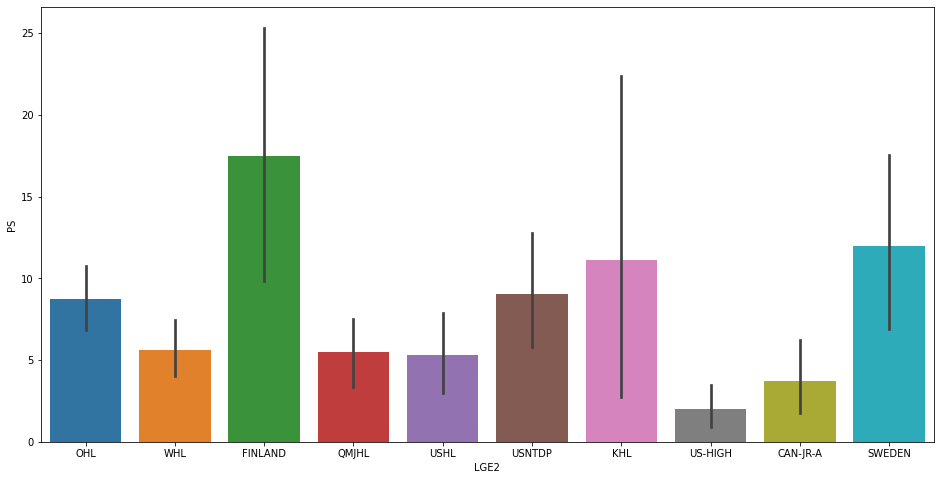

In [66]:
plt.figure(figsize=(16, 8))
plot1 = sns.barplot(x="LGE2", y="PS", data=df_top12)

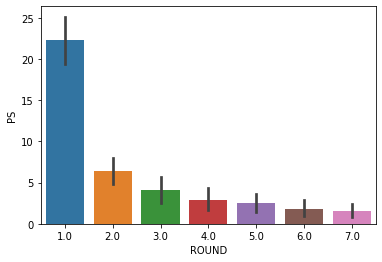

In [67]:
#plot average point shares by draft round
plot_rnd = sns.barplot(x="ROUND", y="PS", data=df)

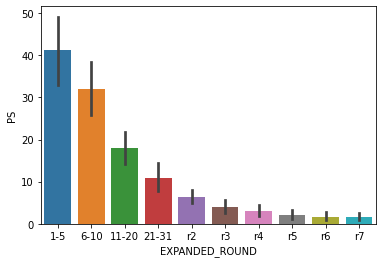

In [68]:
#plot average point shares by draft round
plot_exp_rnd = sns.barplot(x="EXPANDED_ROUND", y="PS", data=df)

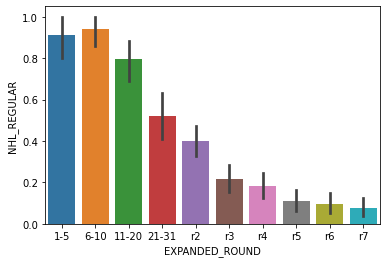

In [69]:
#plot average nhl regular by draft round
plot_nhl_reg_by_rd = sns.barplot(x="EXPANDED_ROUND", y="NHL_REGULAR", data=df)

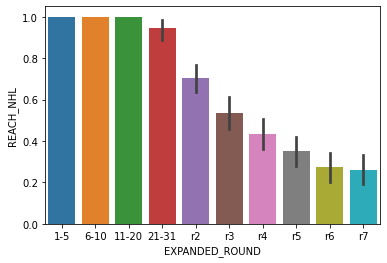

In [70]:
#plot average reach nhl by draft round
plot_nhl_reg_by_rd = sns.barplot(x="EXPANDED_ROUND", y="REACH_NHL", data=df)

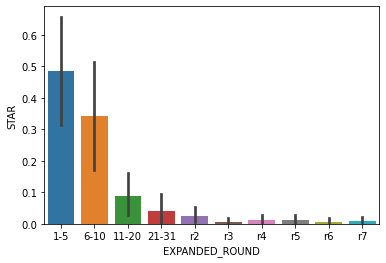

In [71]:
#plot average NHL star by draft round
plot_nhl_reg_by_rd = sns.barplot(x="EXPANDED_ROUND", y="STAR", data=df)

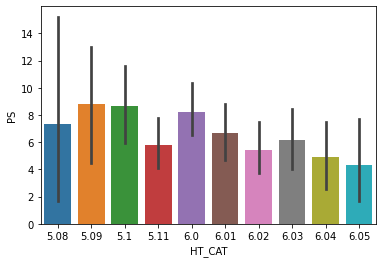

In [72]:
#plot Height by PS
plot_nhl_reg_by_rd = sns.barplot(x="HT_CAT", y="PS", data=df)

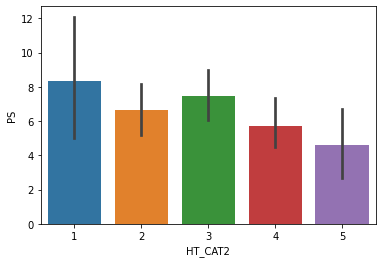

In [99]:
#plot Height by PS
plot_nhl_reg_by_rd = sns.barplot(x="HT_CAT2", y="PS", data=df)

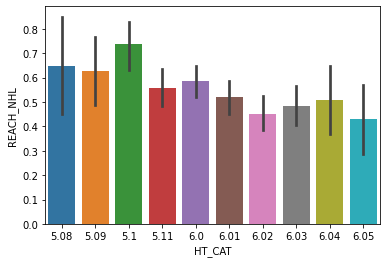

In [73]:
#plot Height by reach NHL
plot_nhl_reg_by_rd = sns.barplot(x="HT_CAT", y="REACH_NHL", data=df)

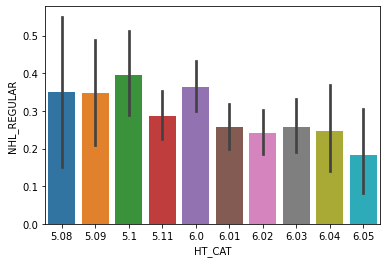

In [74]:
#plot Height by NHL Regular
plot_nhl_reg_by_rd = sns.barplot(x="HT_CAT", y="NHL_REGULAR", data=df)

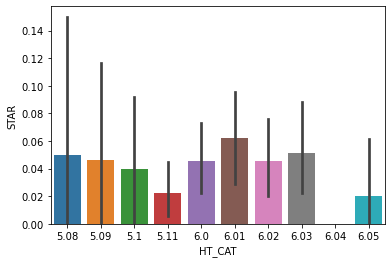

In [75]:
#plot Height by NHL star
plot_nhl_reg_by_rd = sns.barplot(x="HT_CAT", y="STAR", data=df)

In [76]:
#Examine D - dataframe
df_D  =df[df['POS2'] == 'D']

In [77]:
#examine F - dataframe
df_F  =df[(df['POS2'] == 'C') | (df['POS2'] == 'W')]

## Analyze Defensemen

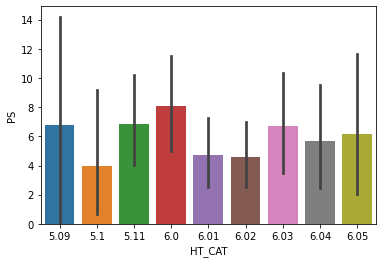

In [78]:
#plot Height by PS
plot_nhl_reg_by_rd = sns.barplot(x="HT_CAT", y="PS", data=df_D)

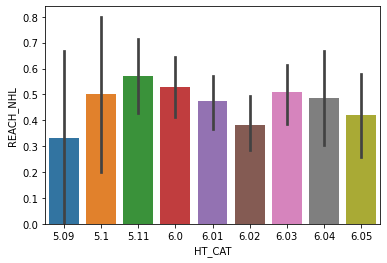

In [79]:
#D man HT by reach NHL
plot_nhl_reg_by_rd = sns.barplot(x="HT_CAT", y="REACH_NHL", data=df_D)

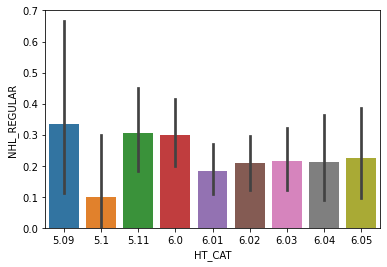

In [80]:
#D man HT by NHL regular
plot_nhl_reg_by_rd = sns.barplot(x="HT_CAT", y="NHL_REGULAR", data=df_D)

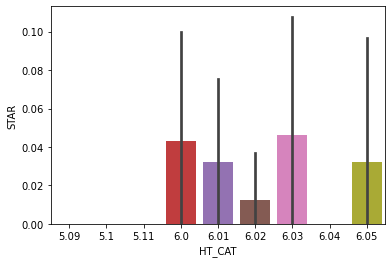

In [81]:
#D man HT by NHL star
plot_nhl_reg_by_rd = sns.barplot(x="HT_CAT", y="STAR", data=df_D)

Interesting results here for D-men. As long as you're 5'10 you have an equal chance to make the NHL. 5'11 and 6'0 have a hicher chance of being a regular than taller D-men. But to be a star, you have to be 6'0 or taller.

In [82]:
#League x D - reach NHL
df_D.groupby('LGE2')['REACH_NHL'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
WHL,87.0,0.528736,0.502067,0.0,0.00,1.0,1.00,1.0
OHL,73.0,0.506849,0.503413,0.0,0.00,1.0,1.00,1.0
QMJHL,42.0,0.380952,0.491507,0.0,0.00,0.0,1.00,1.0
USHL,39.0,0.487179,0.506370,0.0,0.00,0.0,1.00,1.0
SWEDEN-J20,36.0,0.388889,0.494413,0.0,0.00,0.0,1.00,1.0
US-HIGH,35.0,0.200000,0.405840,0.0,0.00,0.0,0.00,1.0
USNTDP,25.0,0.680000,0.476095,0.0,0.00,1.0,1.00,1.0
NCAA,23.0,0.739130,0.448978,0.0,0.50,1.0,1.00,1.0
CAN-JR-A,21.0,0.333333,0.483046,0.0,0.00,0.0,1.00,1.0


In [83]:
#League x D - NHL reg
df_D.groupby('LGE2')['NHL_REGULAR'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
WHL,87.0,0.241379,0.430400,0.0,0.00,0.0,0.00,1.0
OHL,73.0,0.273973,0.449082,0.0,0.00,0.0,1.00,1.0
QMJHL,42.0,0.142857,0.354169,0.0,0.00,0.0,0.00,1.0
USHL,39.0,0.153846,0.365518,0.0,0.00,0.0,0.00,1.0
SWEDEN-J20,36.0,0.166667,0.377964,0.0,0.00,0.0,0.00,1.0
US-HIGH,35.0,0.057143,0.235504,0.0,0.00,0.0,0.00,1.0
USNTDP,25.0,0.440000,0.506623,0.0,0.00,0.0,1.00,1.0
NCAA,23.0,0.391304,0.499011,0.0,0.00,0.0,1.00,1.0
CAN-JR-A,21.0,0.238095,0.436436,0.0,0.00,0.0,0.00,1.0


In [84]:
#League x D - NHL star
df_D.groupby('LGE2')['STAR'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
WHL,87.0,0.022989,0.150736,0.0,0.00,0.0,0.00,1.0
OHL,73.0,0.041096,0.199886,0.0,0.00,0.0,0.00,1.0
QMJHL,42.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
USHL,39.0,0.025641,0.160128,0.0,0.00,0.0,0.00,1.0
SWEDEN-J20,36.0,0.027778,0.166667,0.0,0.00,0.0,0.00,1.0
US-HIGH,35.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
USNTDP,25.0,0.080000,0.276887,0.0,0.00,0.0,0.00,1.0
NCAA,23.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
CAN-JR-A,21.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


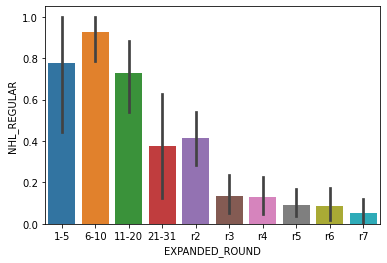

In [85]:
#plot average nhl regular D by draft round
plot_nhl_reg_by_rd = sns.barplot(x="EXPANDED_ROUND", y="NHL_REGULAR", data=df_D)

## Analyze Forwards

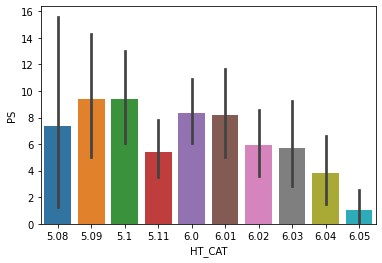

In [86]:
#plot F Height by PS
plot = sns.barplot(x="HT_CAT", y="PS", data=df_F)

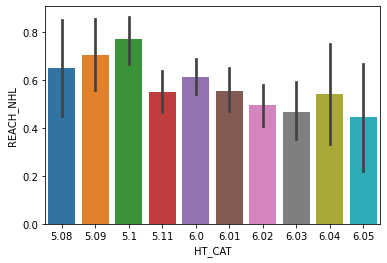

In [87]:
#F HT by reach NHL
plot = sns.barplot(x="HT_CAT", y="REACH_NHL", data=df_F)

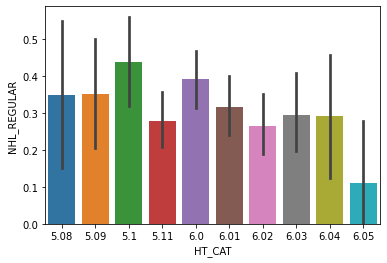

In [88]:
#F HT by NHL regular
plot = sns.barplot(x="HT_CAT", y="NHL_REGULAR", data=df_F)

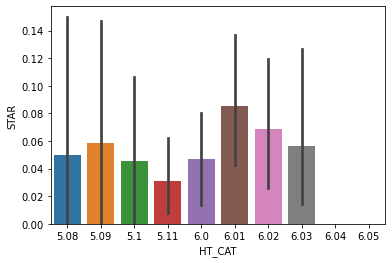

In [89]:
#F HT by NHL star
plot = sns.barplot(x="HT_CAT", y="STAR", data=df_F)

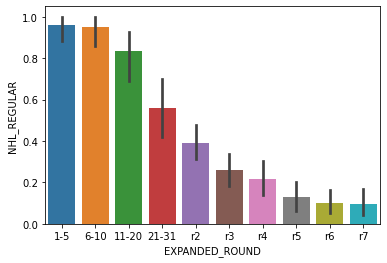

In [90]:
#plot average nhl regular F by draft round
plotf = sns.barplot(x="EXPANDED_ROUND", y="NHL_REGULAR", data=df_F)

For forwards, height isn't an issue like it is for D-men. Close to uniform distributions for PS, NHL regulars, reaching the NHL. For star forwards, there is a small spike at 6'1 and 6'2 and interestingly there are no star forwards 6'4 or taller. But for reaching the NHL, being under 6'0 appears to be an advantage. This is likely because forwards drafted under 6'0 are actually just good hockey players, with less physical projectability.

In [91]:
#League x F - reach NHL 
df_F.groupby('LGE2')['REACH_NHL'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
OHL,172.0,0.656977,0.476105,0.0,0.00,1.0,1.0,1.0
WHL,120.0,0.491667,0.502027,0.0,0.00,0.0,1.0,1.0
QMJHL,87.0,0.574713,0.497253,0.0,0.00,1.0,1.0,1.0
US-HIGH,61.0,0.360656,0.484176,0.0,0.00,0.0,1.0,1.0
USHL,56.0,0.607143,0.492805,0.0,0.00,1.0,1.0,1.0
SWEDEN-J20,48.0,0.437500,0.501328,0.0,0.00,0.0,1.0,1.0
USNTDP,33.0,0.787879,0.415149,0.0,1.00,1.0,1.0,1.0
NCAA,25.0,0.720000,0.458258,0.0,0.00,1.0,1.0,1.0
CAN-JR-A,25.0,0.360000,0.489898,0.0,0.00,0.0,1.0,1.0


In [92]:
#League x F - NHL regular
df_F.groupby('LGE2')['NHL_REGULAR'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
OHL,172.0,0.383721,0.487711,0.0,0.00,0.0,1.00,1.0
WHL,120.0,0.216667,0.413701,0.0,0.00,0.0,0.00,1.0
QMJHL,87.0,0.310345,0.465317,0.0,0.00,0.0,1.00,1.0
US-HIGH,61.0,0.147541,0.357588,0.0,0.00,0.0,0.00,1.0
USHL,56.0,0.285714,0.455842,0.0,0.00,0.0,1.00,1.0
SWEDEN-J20,48.0,0.291667,0.459340,0.0,0.00,0.0,1.00,1.0
USNTDP,33.0,0.484848,0.507519,0.0,0.00,0.0,1.00,1.0
NCAA,25.0,0.360000,0.489898,0.0,0.00,0.0,1.00,1.0
CAN-JR-A,25.0,0.280000,0.458258,0.0,0.00,0.0,1.00,1.0


In [93]:
#League x F - NHL star
df_F.groupby('LGE2')['STAR'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
OHL,172.0,0.063953,0.245384,0.0,0.0,0.0,0.0,1.0
WHL,120.0,0.058333,0.235355,0.0,0.0,0.0,0.0,1.0
QMJHL,87.0,0.057471,0.234090,0.0,0.0,0.0,0.0,1.0
US-HIGH,61.0,0.016393,0.128037,0.0,0.0,0.0,0.0,1.0
USHL,56.0,0.035714,0.187256,0.0,0.0,0.0,0.0,1.0
SWEDEN-J20,48.0,0.020833,0.144338,0.0,0.0,0.0,0.0,1.0
USNTDP,33.0,0.030303,0.174078,0.0,0.0,0.0,0.0,1.0
NCAA,25.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
CAN-JR-A,25.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [94]:
#League x F - PS
df_F.groupby('LGE2')['PS'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
LGE2,,,,,,,,
OHL,172.0,9.179651,16.811768,-0.6,0.00,0.85,12.175,84.4
WHL,120.0,5.149167,13.418318,-0.4,0.00,0.00,1.125,71.5
QMJHL,87.0,6.618391,14.359030,-1.4,0.00,0.00,4.600,74.2
US-HIGH,61.0,2.621311,7.743624,-0.4,0.00,0.00,0.100,43.9
USHL,56.0,6.373214,13.865044,-1.0,0.00,0.00,4.650,68.3
SWEDEN-J20,48.0,4.664583,10.506381,-1.0,0.00,0.00,6.025,56.8
USNTDP,33.0,7.251515,12.068324,-0.3,0.00,0.70,8.800,48.0
NCAA,25.0,4.616000,9.207863,-0.3,0.00,0.30,6.900,41.1
CAN-JR-A,25.0,2.444000,4.536342,0.0,0.00,0.00,2.800,15.9


# Output Clean DF

In [95]:
df.columns

Index(['OVERALL', 'NHL_TEAM', 'PLAYER', 'NATION', 'POS', 'AGE',
       'LAST_PLAYED_NHL', 'NHL_GP', 'NHL_G', 'NHL_A', 'NHL_PTS', 'NHL_PLUSMIN',
       'NHL_PIM', 'PS', 'YEAR', 'POS2', 'ROUND', 'DRAFT_YEAR', 'DRAFT_TEAM',
       'AM_TEAM', 'LGE', 'GP', 'G', 'A', 'PTS', 'PIM', 'HT', 'WT', 'LGE2',
       'PPG', 'GPG', 'APG', 'REACH_NHL', 'STAR', 'NHL_REGULAR', 'PRO_LEAGUE',
       'EXPANDED_ROUND', 'AM_GPG', 'AM_APG', 'AM_PPG', 'AM_PIM_PG', 'PS_PG',
       'HT_CAT', 'HT_CAT2', 'GP_STANDARD', 'G_STANDARD', 'A_STANDARD',
       'PTS_STANDARD', 'GPG_STANDARD', 'APG_STANDARD', 'PPG_STANDARD'],
      dtype='object')

In [96]:
df_output = df[['OVERALL', 'NHL_TEAM', 'PLAYER', 'AGE',
               'PS', 'YEAR', 'POS2', 'ROUND', 'DRAFT_YEAR', 'DRAFT_TEAM',
               'GP', 'G', 'A', 'PTS', 'PIM', 'LGE2', 'PRO_LEAGUE',
               'REACH_NHL', 'NHL_REGULAR', 'STAR', 'EXPANDED_ROUND', 'AM_GPG',
               'AM_APG', 'AM_PPG', 'PS_PG', 'HT_CAT', 'HT_CAT2', 'GP_STANDARD',
               'G_STANDARD', 'A_STANDARD', 'PTS_STANDARD',
               'GPG_STANDARD', 'APG_STANDARD', 'PPG_STANDARD']]

In [97]:
#output to excel
df_output.to_excel("C:/Users/BRG4142/Documents/hockey stuff/NHL Draft data/Model ready data/NHL_draft_clean_df.xlsx",
             sheet_name='Sheet1')